In [1]:
# Data Manipulation
import  Pandas as pd
# Data Visiualization
import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'pandas'

In [163]:
df=pd.read_csv('sahibinden_ısparta_kiralık.csv')

In [164]:
df=df.dropna()

In [165]:
df['price'].info

<bound method Series.info of 0        7.000 TL
1        9.000 TL
2        8.000 TL
3       15.000 TL
4       15.000 TL
          ...    
1005    10.750 TL
1006    10.000 TL
1007    23.500 TL
1008    13.000 TL
1009    16.000 TL
Name: price, Length: 1000, dtype: object>

In [166]:
df['title']=df['title'].str.lower()
title_split_data= df['title'].str.split(expand=True)

In [167]:
title_split_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,fati̇h,mahallesi̇nde,ki̇ralik,1+0,apart,None,None,None,None,None,None,None
1,i̇yaş,avm,altinda,sdü,üni̇versi̇te,duraği,2dak.,mesafede...,None,None,None,None
2,i̇sti̇klâl,mahallesi̇,ki̇ralik,1+0,apart,dai̇reler,None,None,None,None,None,None
3,fati̇h,mahallesi̇'nde,sifir,lüx,ki̇ralik,1+1,apart,None,None,None,None,None
4,anadolu,mhl,sinde,2+1,ful,eşyalı,kiralıl,apart,daire,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,dr.,bari̇das'tan,i̇yaş,avm,yani,"1+1(yakit,","i̇nt,",ai̇dat,dahi̇l,fi̇yat),None,None
1006,isparta,merkez,fati̇h,mah.,adli̇yeye,yakin,2+1,eşyali,apart,None,None,None
1007,gözde,emlak'tan,çünür,mh,site,içi,3+1,daire,None,None,None,None
1008,modern,evlerde,2+0,kiralık,apart,None,None,None,None,None,None,None


In [168]:
title_split_data.columns=[f'Word_{i+1}' for i in range(title_split_data.shape[1])]
df=df.join(title_split_data)

In [170]:
df['price']=df['price'].astype('string')
df['m2']=df['m2'].astype('string')

In [171]:
df['price']=df['price'].str.replace(' ','').str.replace('TL','')
df['price']=df['price'].str.replace('.','')

In [172]:
df['m2']=df['m2'].str.replace(' ','')

In [173]:
df['price']=pd.to_numeric(df['price'])
df['m2']=pd.to_numeric(df['m2'])

In [174]:
# summary statistical information
df['price'].describe()

count         1000.0
mean       14986.146
std      6726.846143
min           5000.0
25%          10000.0
50%          13000.0
75%          18000.0
max          88000.0
Name: price, dtype: Float64

In [175]:
df['m2'].describe()

count       1000.0
mean       87.6535
std      48.299224
min            7.5
25%           50.0
50%           65.0
75%          135.0
max          400.0
Name: m2, dtype: Float64

In [176]:
df['location'].unique()

array(['Anadolu\nFatih Mah.', 'Anadolu\nModern Evler Mah.',
       'Kepeci\nİstiklal Mh.', 'Kutlubey\nIşıkkent Mh.',
       'Anadolu\nZafer Mah.', 'Çelebiler\nAyazmana Mah.',
       'Anadolu\nÇünür Mh.', 'Kutlubey\nGülistan Mh.',
       'Çelebiler\nÇelebiler Mh.', 'Çelebiler\nTuran Mah.',
       'Kutlubey\nHızırbey Mh.', 'Anadolu\nMuzaffer Türkeş Mh.',
       'Kepeci\nDavraz Mah.', 'Anadolu\nBahçelievler Mh.',
       'Çelebiler\nHalıkent Mh.', 'Anadolu\nSanayi Mah.',
       'Anadolu\nYedişehitler Mh.', 'Kepeci\nKaraağaç Mh.',
       'Çelebiler\nEmre Mah.', 'Kutlubey\nBinbirevler Mah.',
       'Kutlubey\nBatıkent Mh.', 'Kepeci', 'Çelebiler\nGazi Kemal Mah.',
       'Anadolu', 'Tokmacık\nYayla Mah.', 'Anadolu\nMehmet Tönge Mh.',
       'Anadolu\nYeni Mh.', 'Kutlubey\nBağlar Mh.',
       'Kutlubey\nPirimehmet Mah.', 'Çelebiler\nDoğancı Mh.',
       'Çelebiler\nVatan Mah.', 'Çelebiler\nİskender Mh.',
       'Çelebiler\nHalife Sultan Mah.', 'Çelebiler\nSidre Mah.',
       'Çelebiler\nGülevl

In [177]:
df['location'].value_counts()

location
Anadolu\nFatih Mah.              154
Anadolu\nÇünür Mh.               143
Anadolu\nBahçelievler Mh.         66
Anadolu\nModern Evler Mah.        65
Kutlubey\nPirimehmet Mah.         59
Kutlubey\nHızırbey Mh.            49
Kepeci\nDavraz Mah.               44
Anadolu\nMuzaffer Türkeş Mh.      38
Anadolu\nYedişehitler Mh.         32
Kutlubey\nBağlar Mh.              27
Kepeci\nİstiklal Mh.              27
Anadolu\nZafer Mah.               27
Anadolu\nSanayi Mah.              21
Çelebiler\nİskender Mh.           19
Anadolu                           18
Kepeci                            18
Kutlubey\nIşıkkent Mh.            16
Çelebiler\nAyazmana Mah.          15
Tokmacık\nYayla Mah.              13
Kutlubey\nBatıkent Mh.            13
Çelebiler\nVatan Mah.             12
Çelebiler\nHalıkent Mh.           12
Kepeci\nKaraağaç Mh.              10
Kutlubey\nGülistan Mh.            10
Çelebiler\nTuran Mah.             10
Kepeci\nSermet Mah.               10
Anadolu\nMehmet Tönge Mh.    

In [178]:
categorial_columns=[
    'location','room','monthday','year'
]

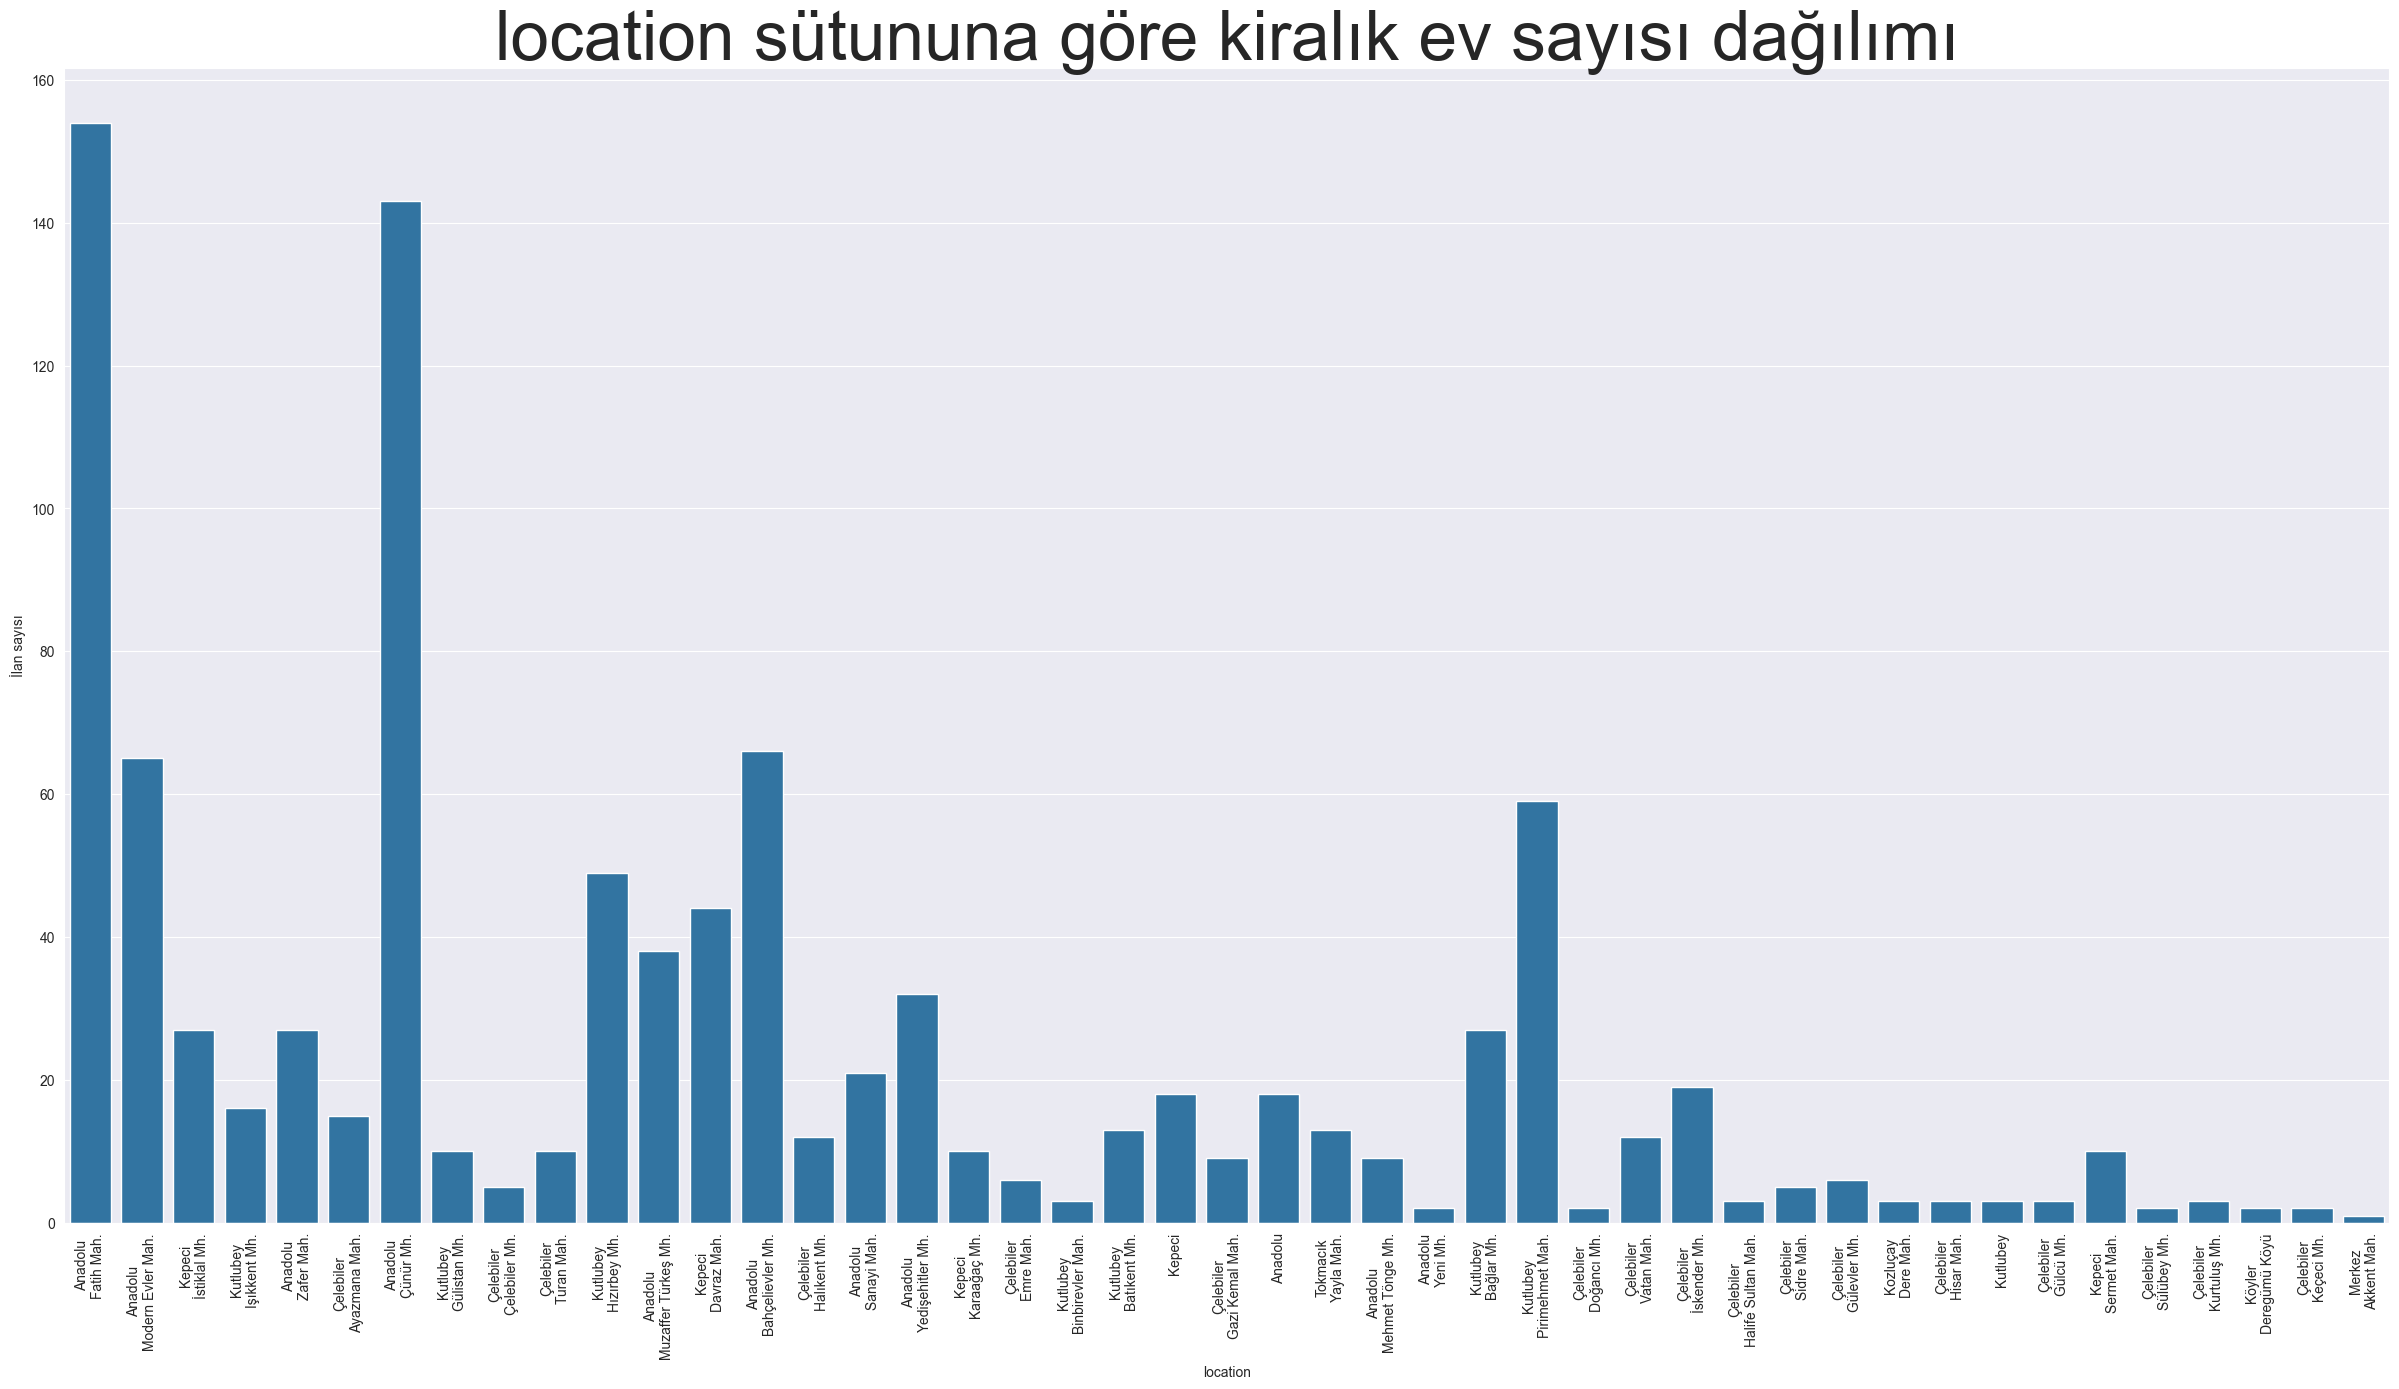

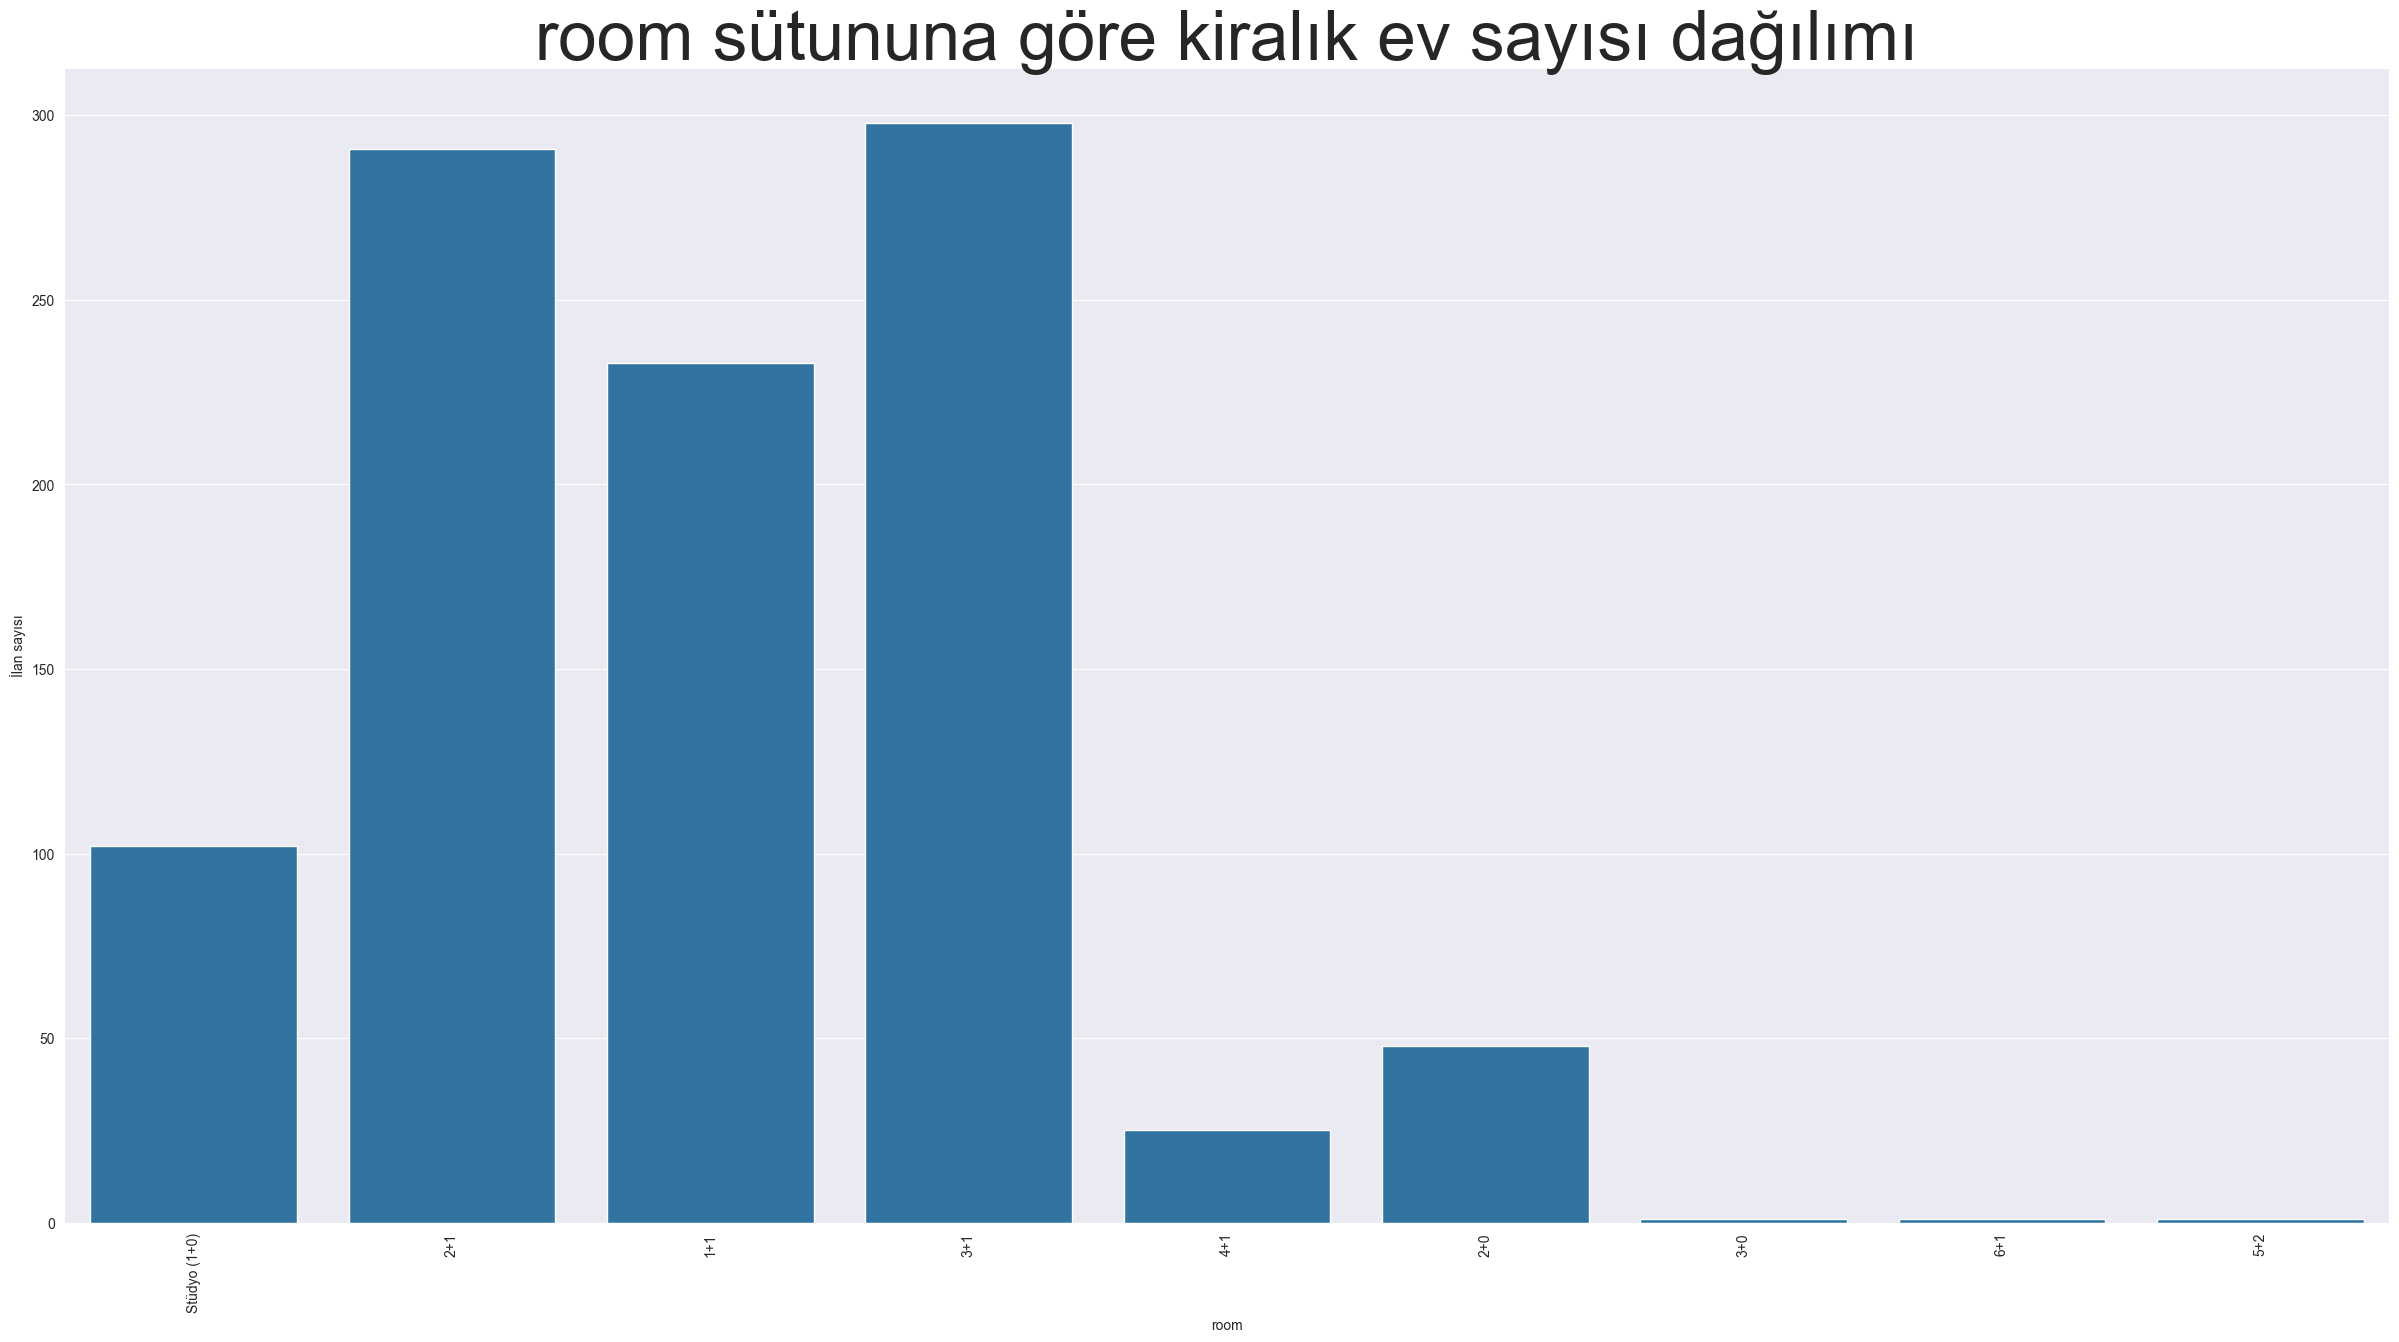

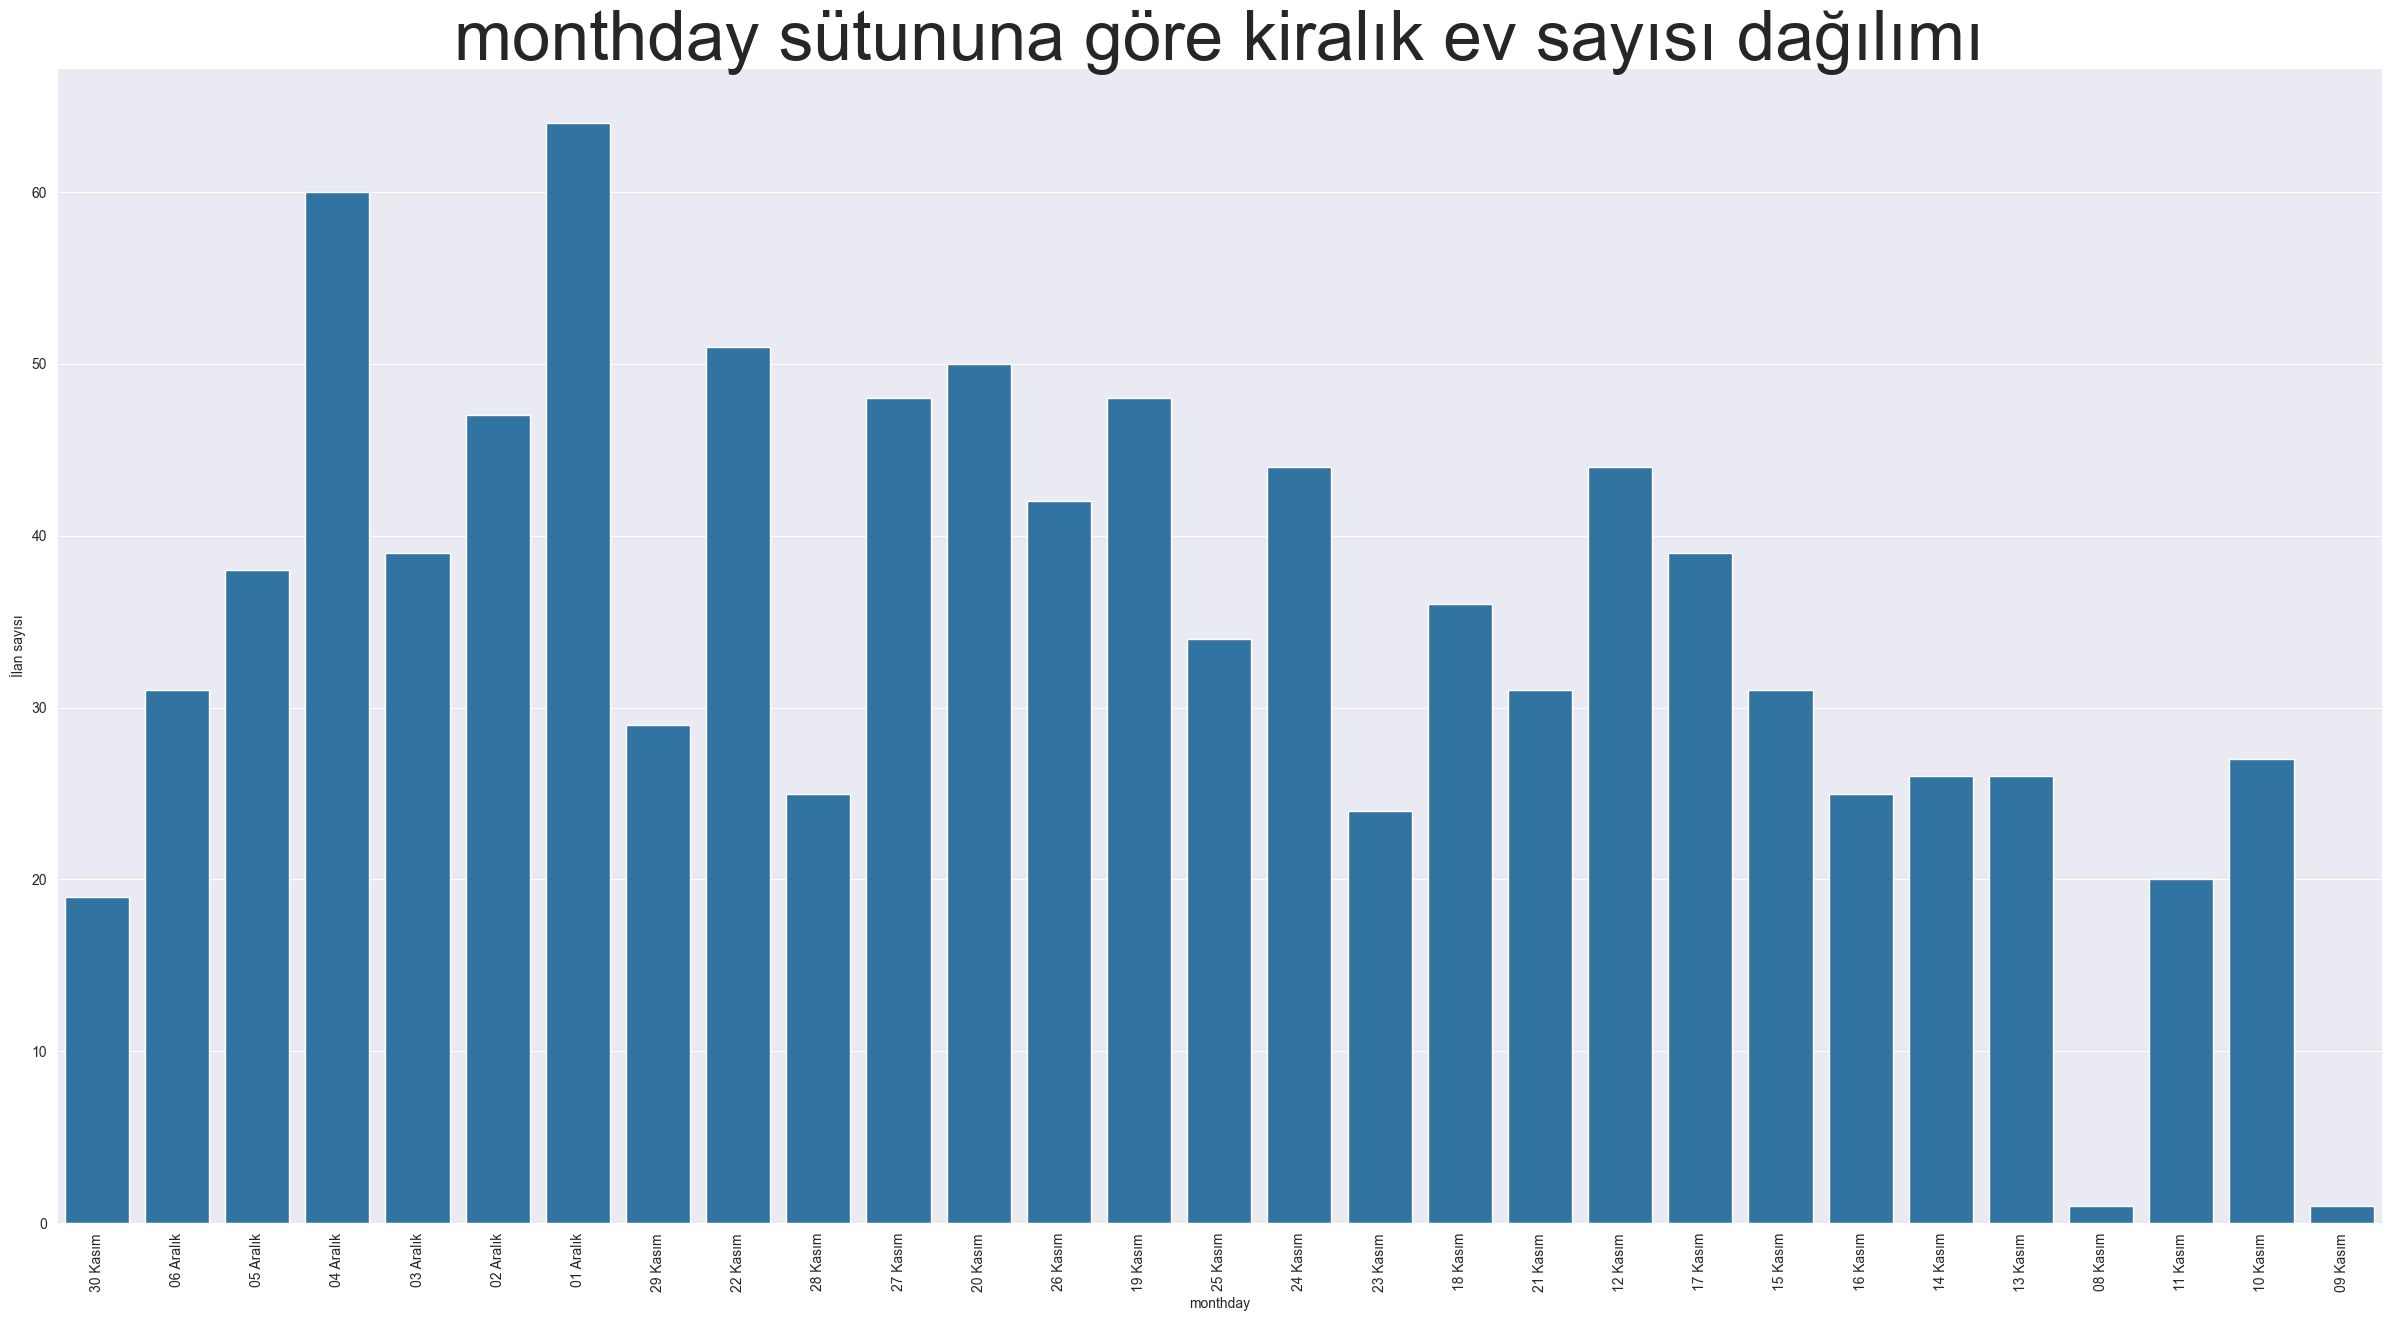

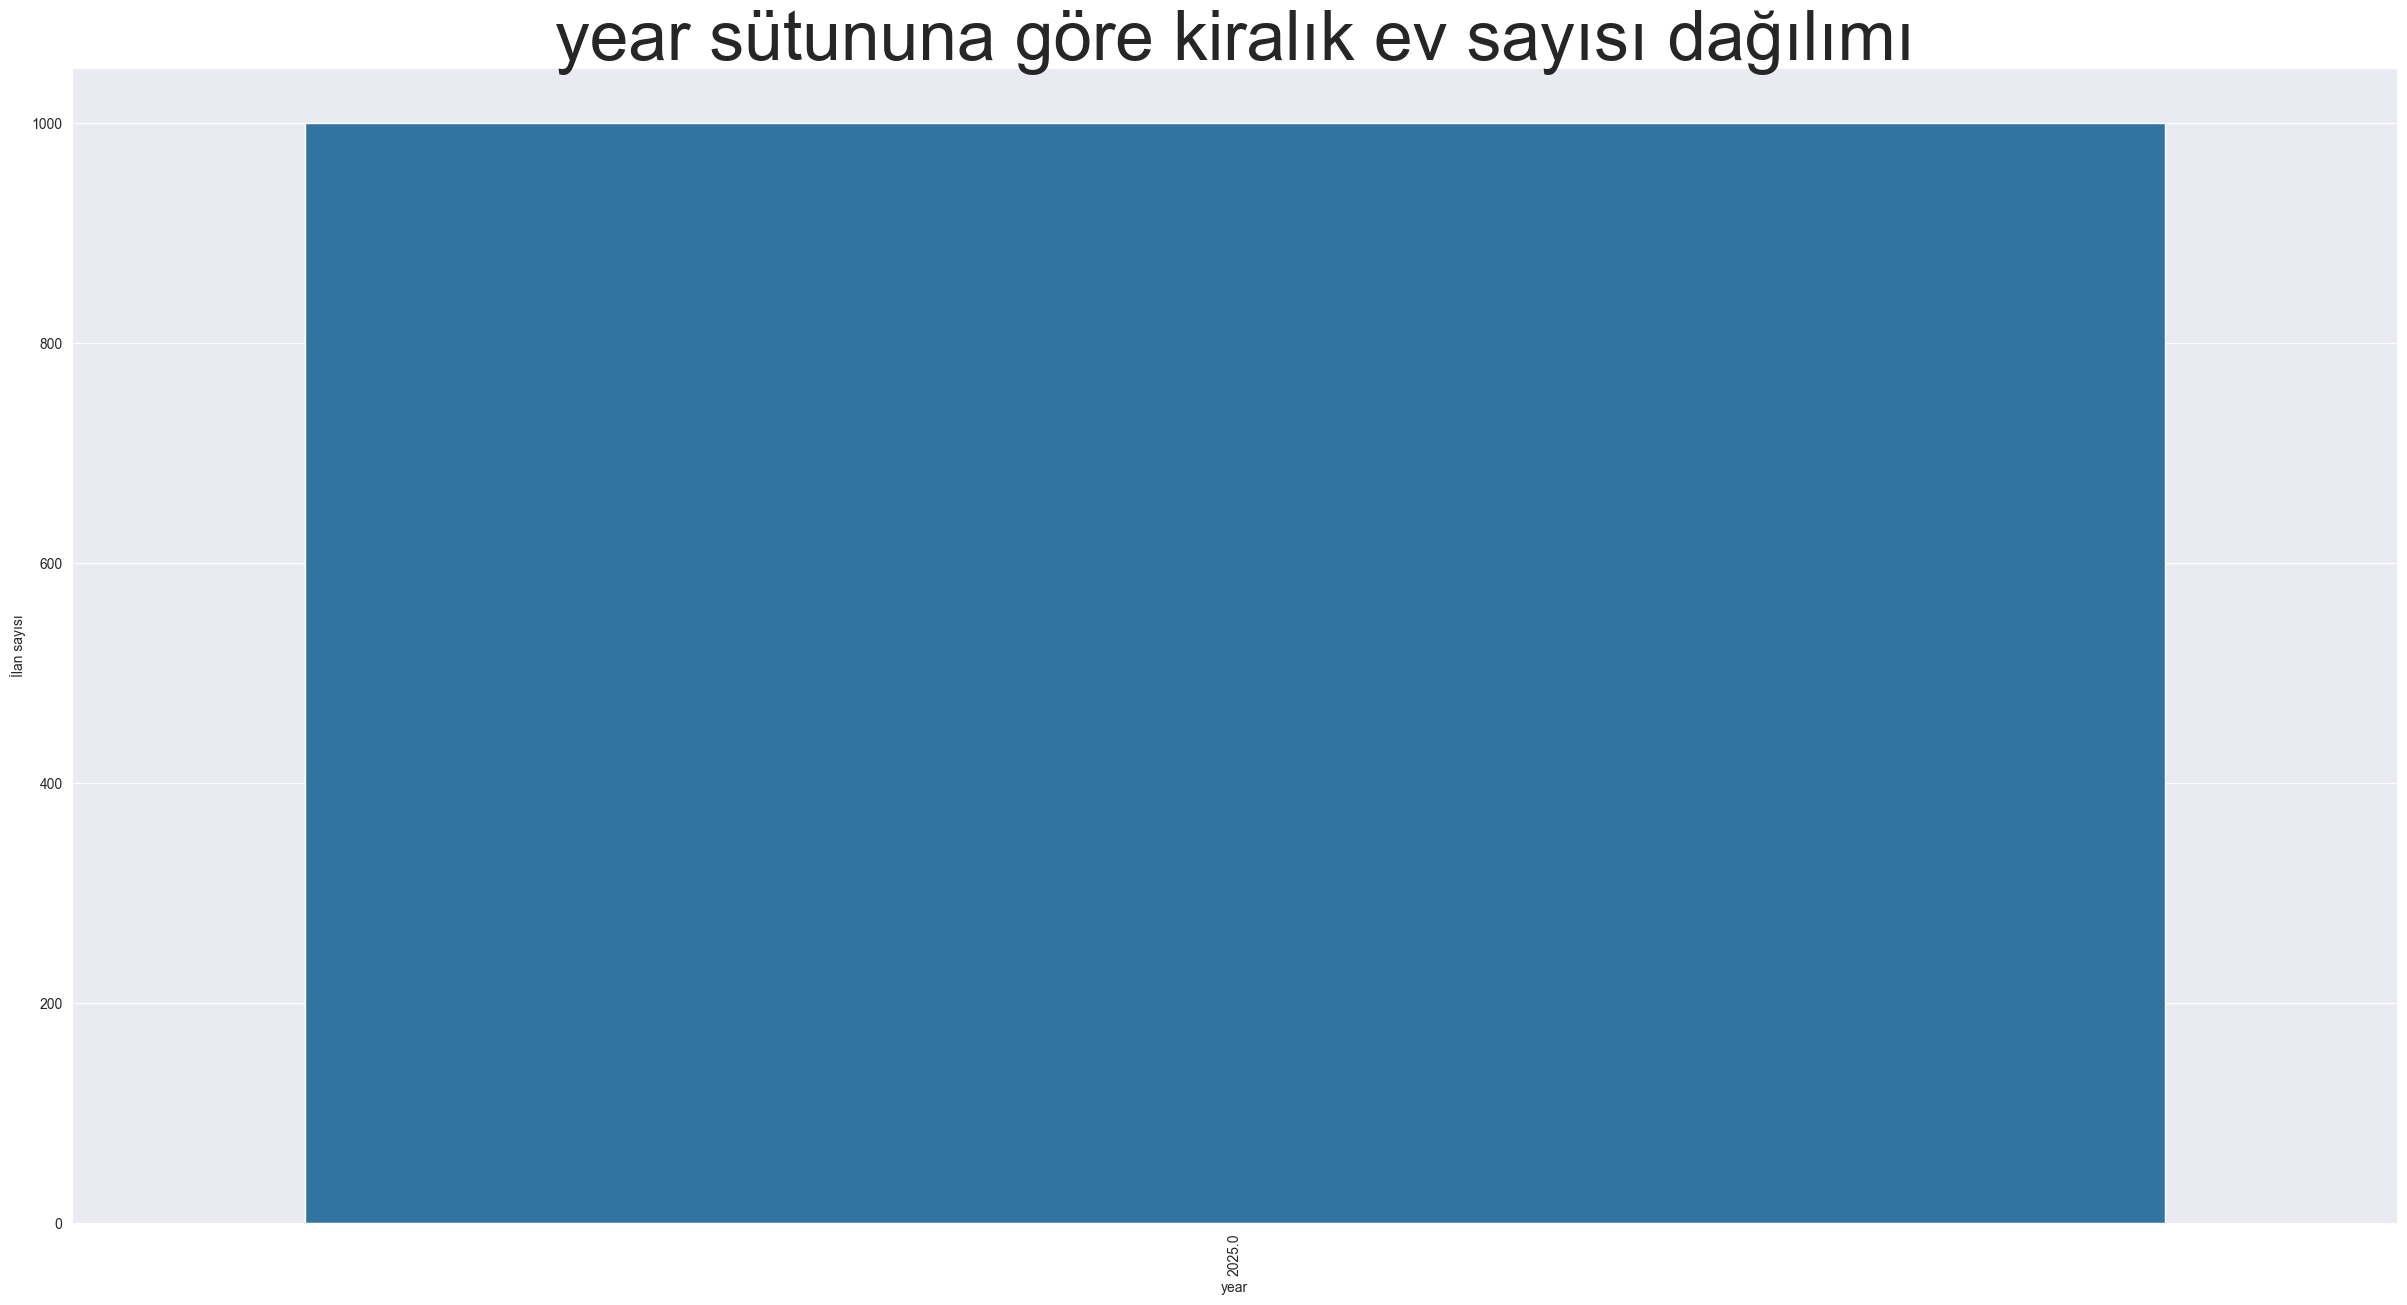

In [179]:
for column in categorial_columns:
   plt.figure(figsize=(30,15))
   sns.countplot(data=df,x=column)
   plt.title(f'{column} sütununa göre kiralık ev sayısı dağılımı',fontsize=50)
   plt.xlabel(f'{column}')
   plt.ylabel('İlan sayısı')
   plt.xticks(rotation=90)
   plt.show()

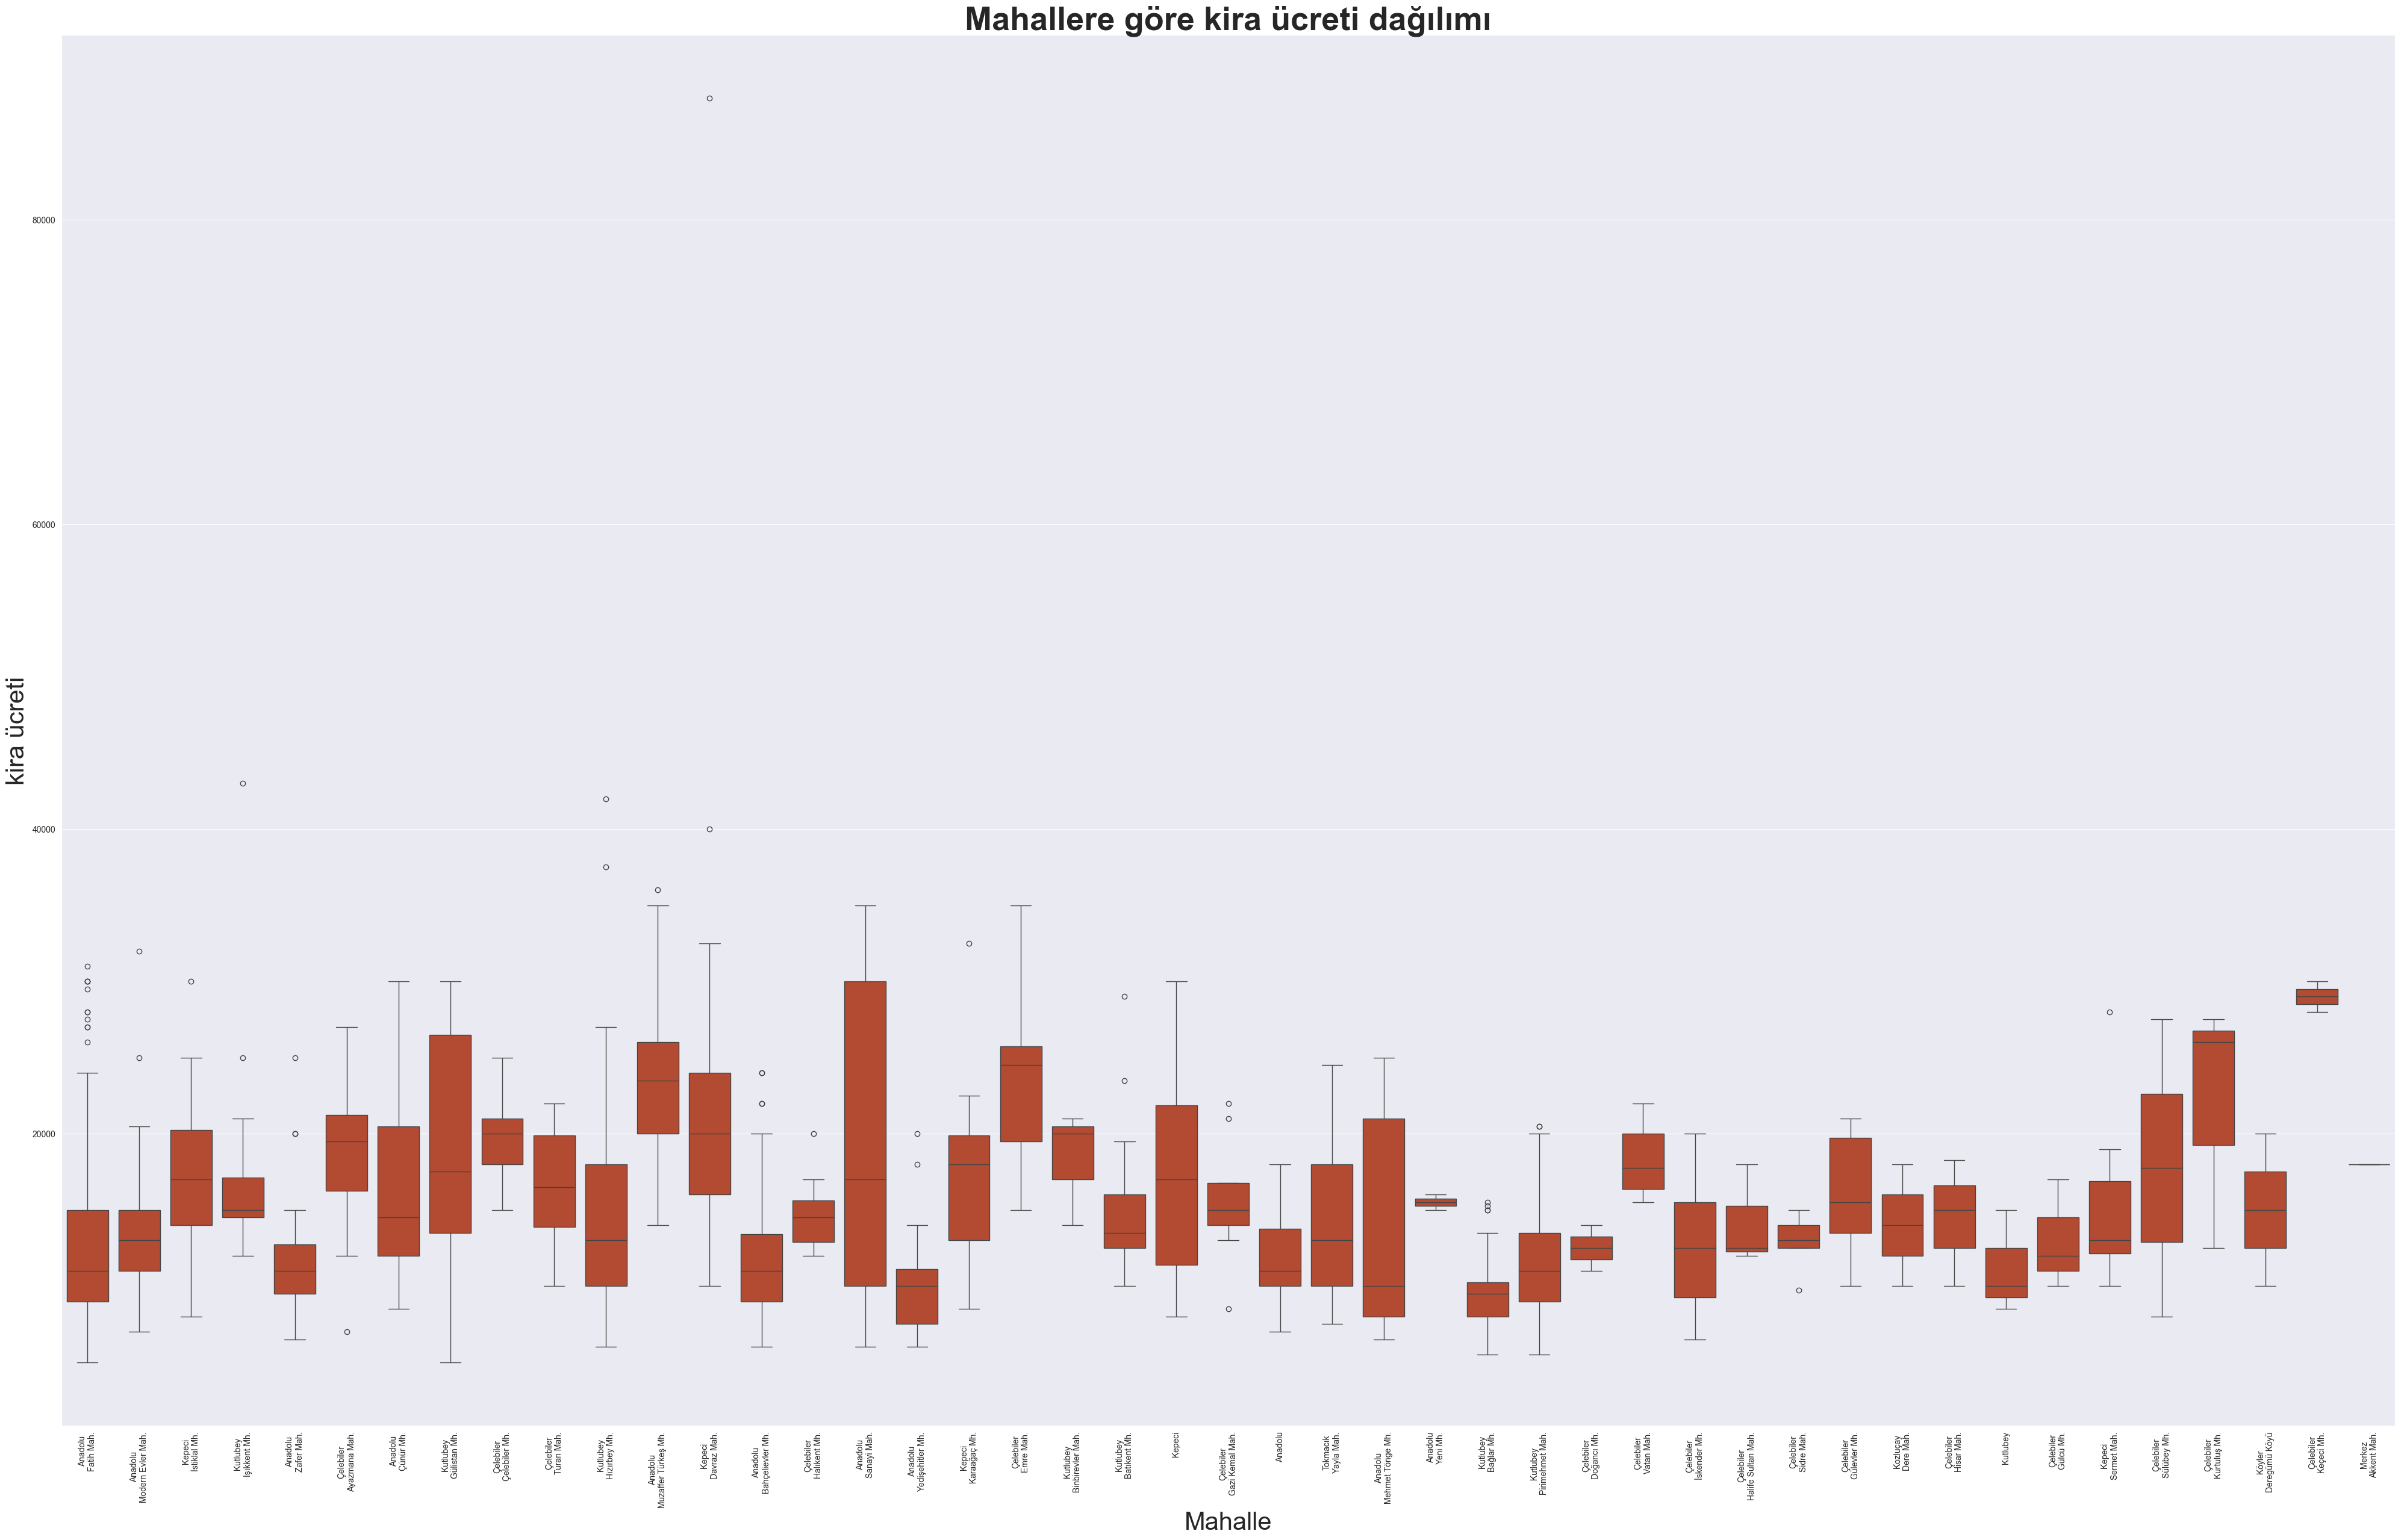

In [180]:
   plt.figure(figsize=(50,30))
   sns.boxplot(data=df,x='location',y='price',color='#C73E1D')
   plt.title('Mahallere göre kira ücreti dağılımı',fontsize=39,fontweight='bold')
   plt.xlabel('Mahalle',fontsize=30)
   plt.ylabel('kira ücreti',fontsize=30)
   plt.xticks(rotation=90)
   plt.show()

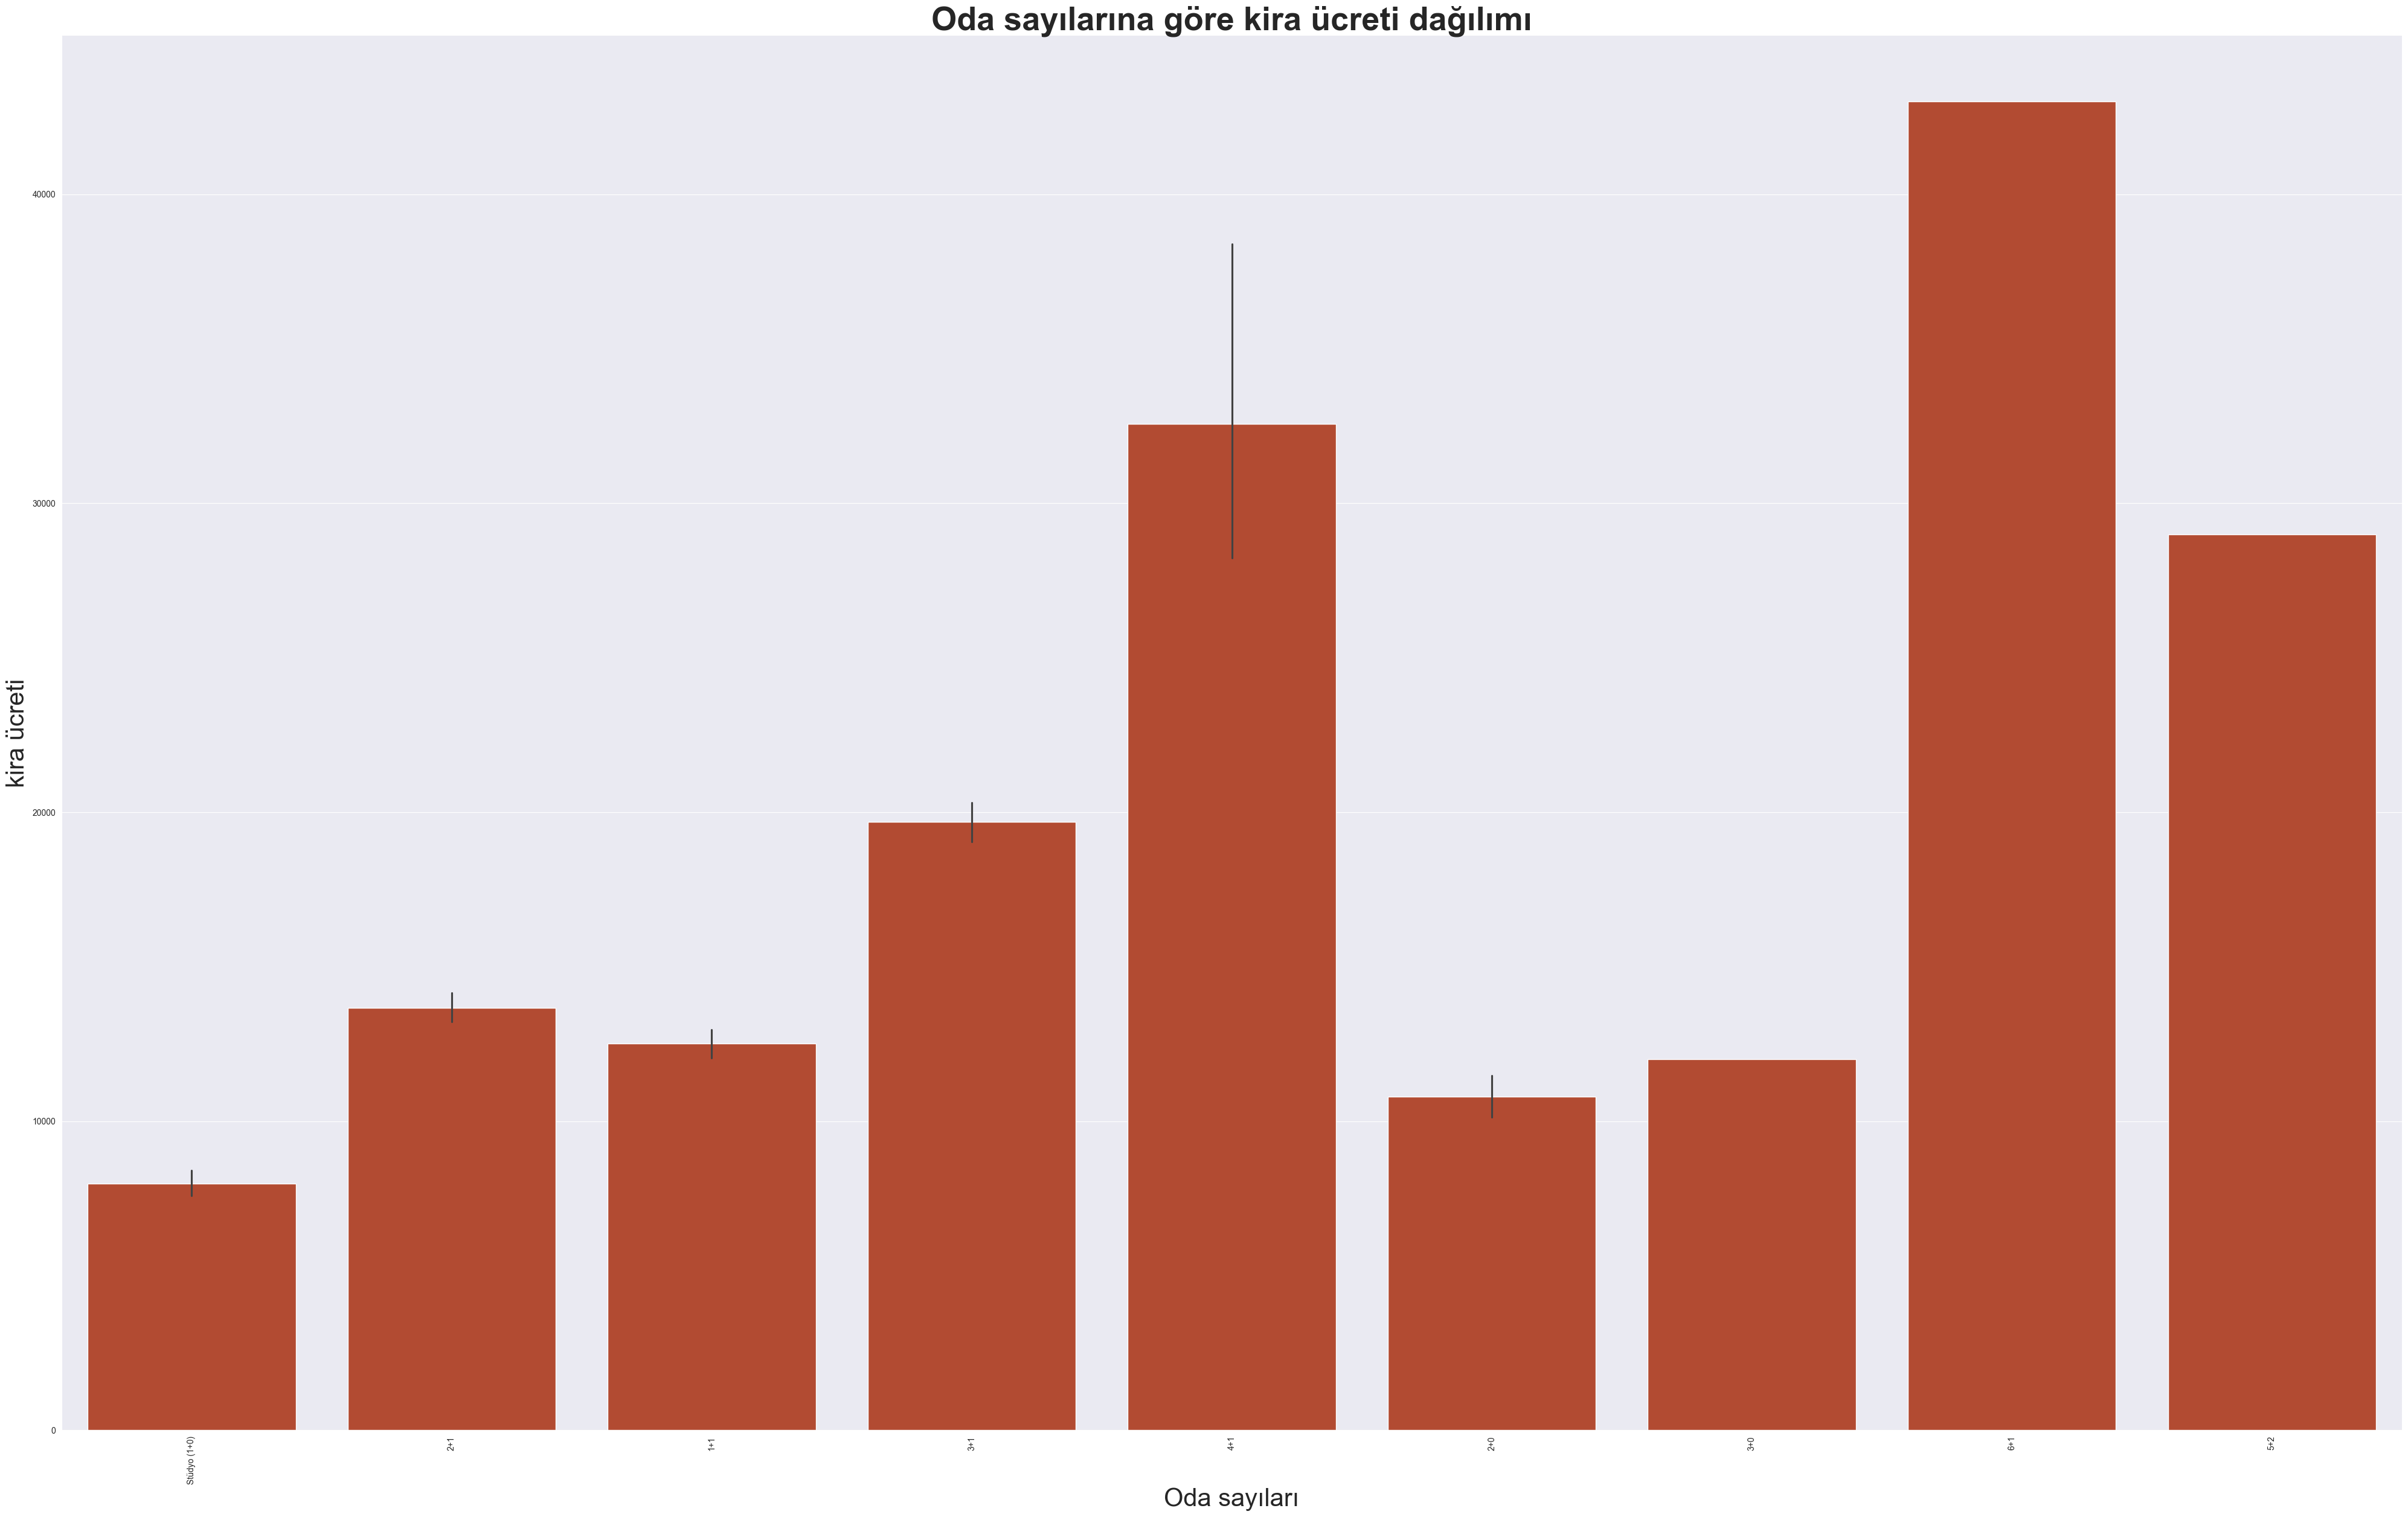

In [181]:
   plt.figure(figsize=(50,30))
   sns.barplot(data=df,x='room',y='price',color='#C73E1D')
   plt.title('Oda sayılarına göre kira ücreti dağılımı',fontsize=39,fontweight='bold')
   plt.xlabel('Oda sayıları',fontsize=30)
   plt.ylabel('kira ücreti',fontsize=30)
   plt.xticks(rotation=90)
   plt.show()

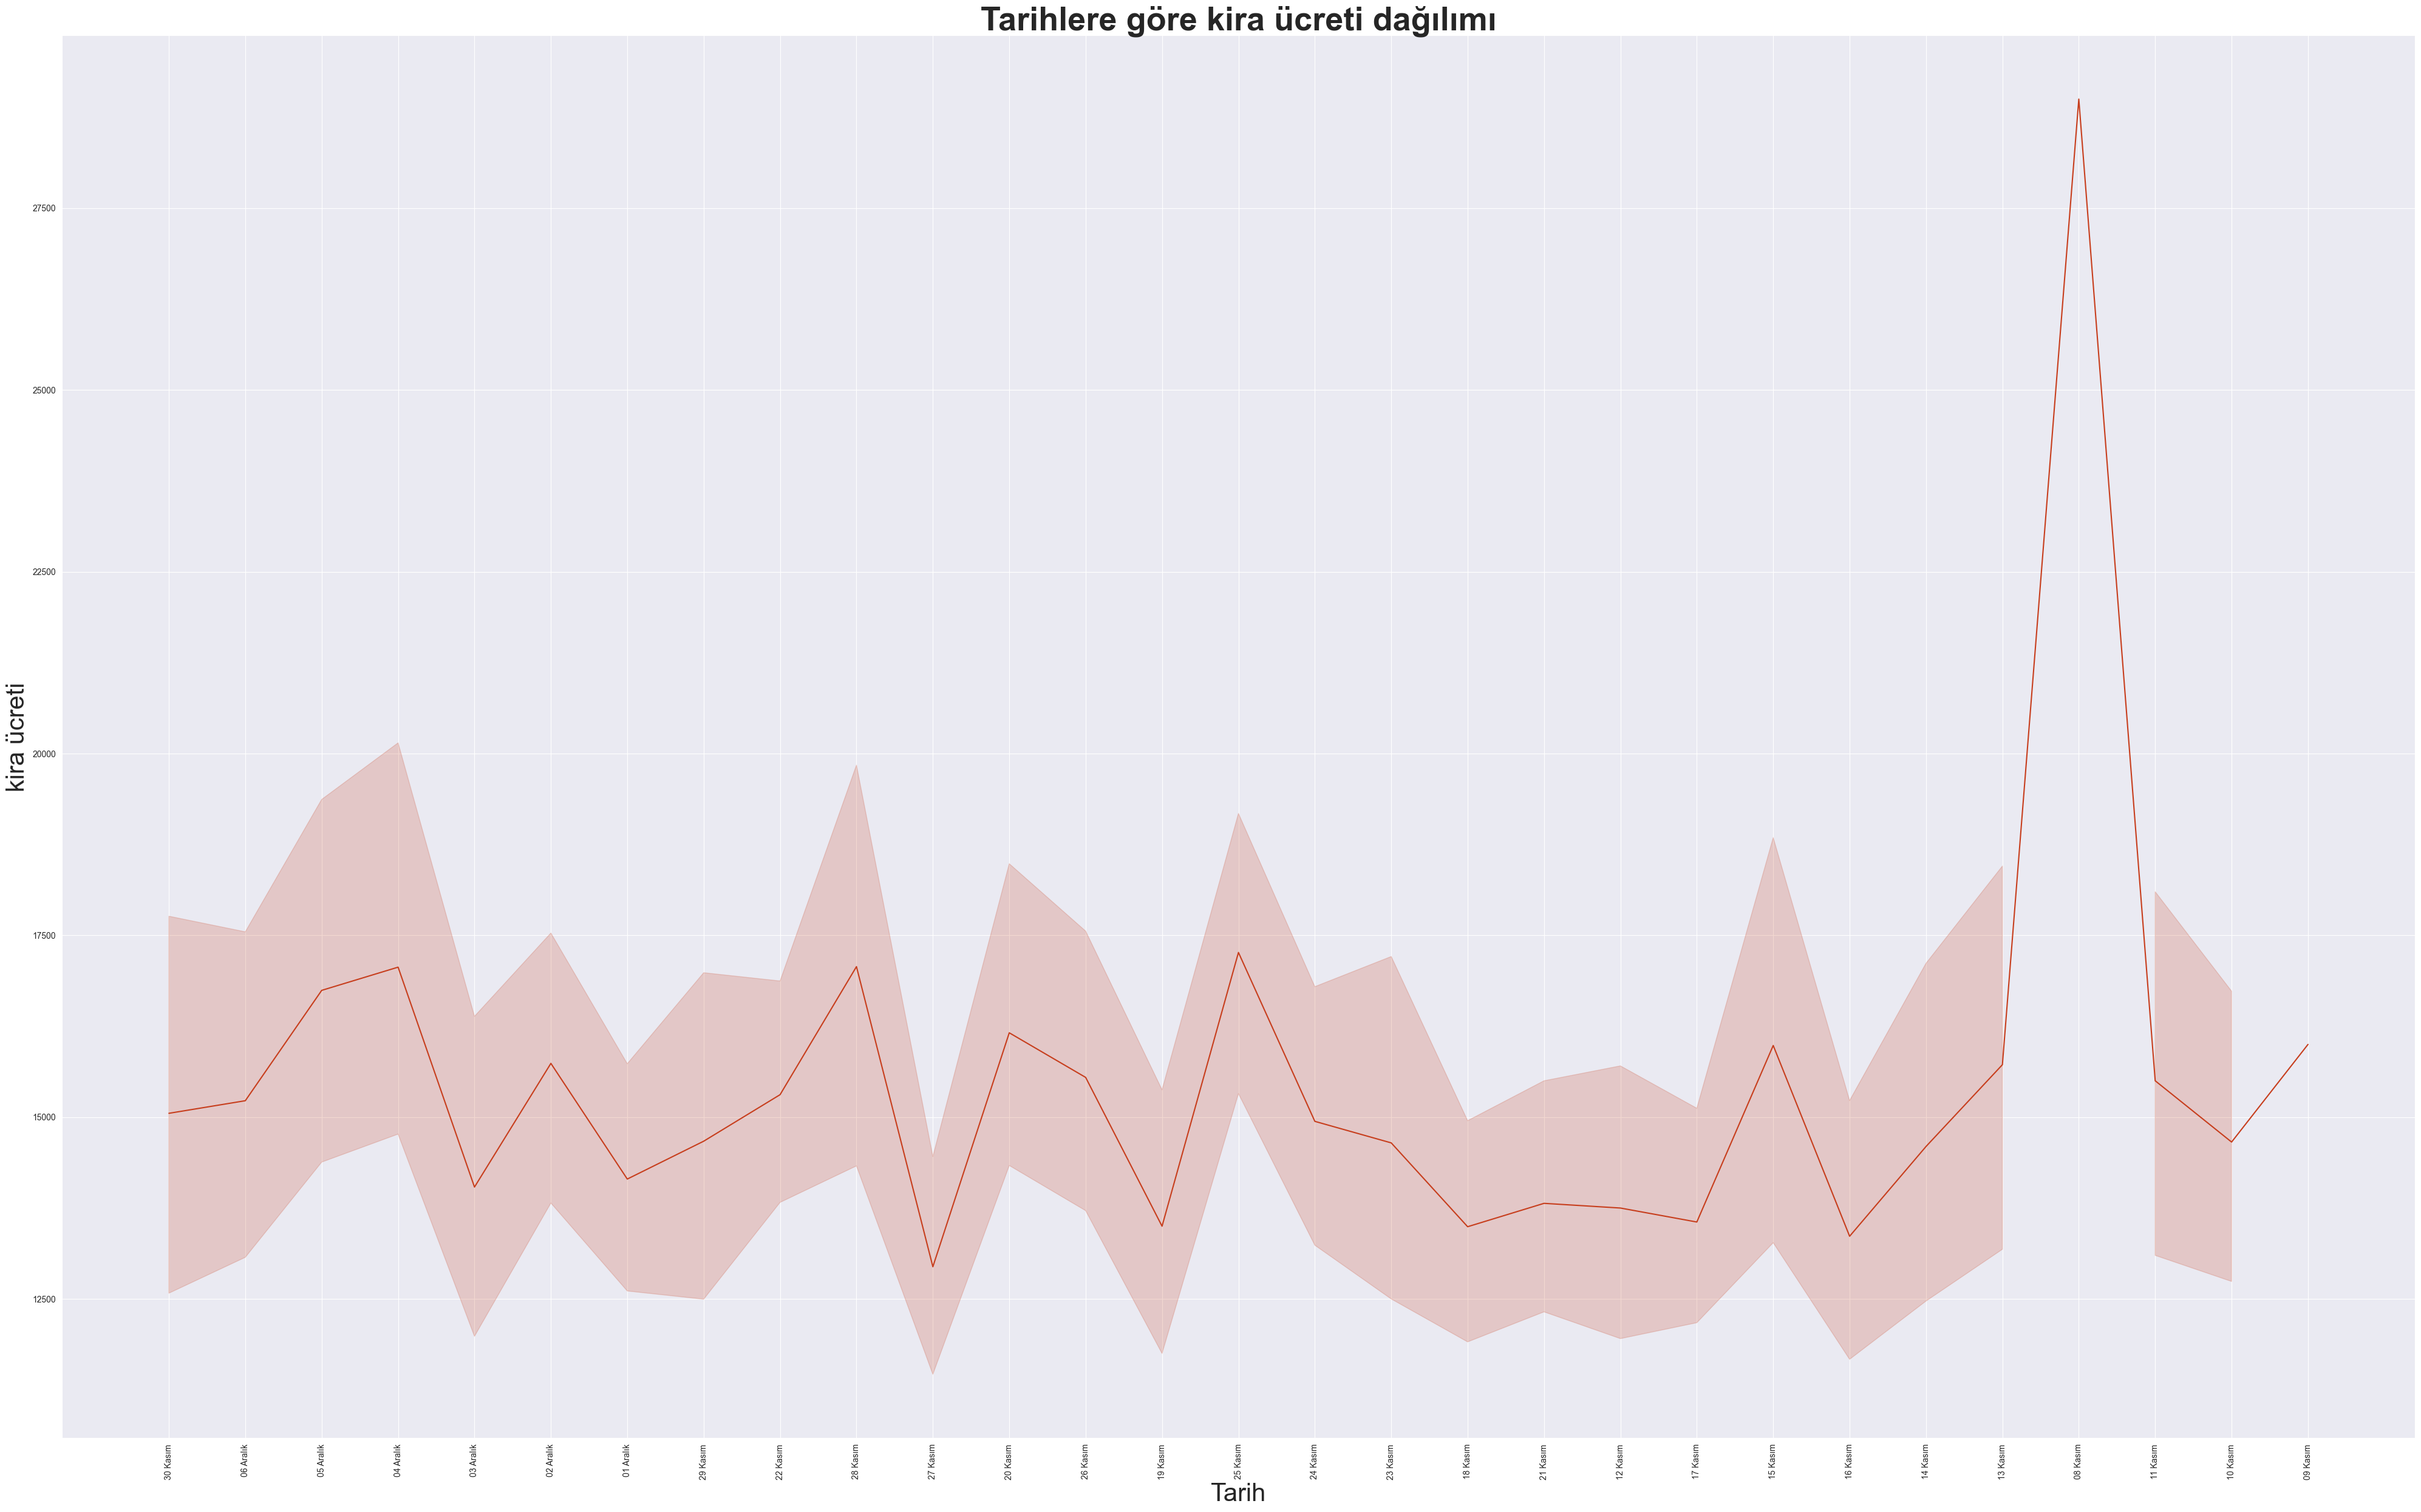

In [182]:
   plt.figure(figsize=(50,30))
   sns.lineplot(data=df,x='monthday',y='price',color='#C73E1D')
   plt.title(f'Tarihlere göre kira ücreti dağılımı',fontsize=39,fontweight='bold')
   plt.xlabel(f'Tarih',fontsize=30)
   plt.ylabel('kira ücreti',fontsize=30)
   plt.xticks(rotation=90)
   plt.xticks(rotation=90)
   plt.show()

Text(0, 0.5, 'Kira')

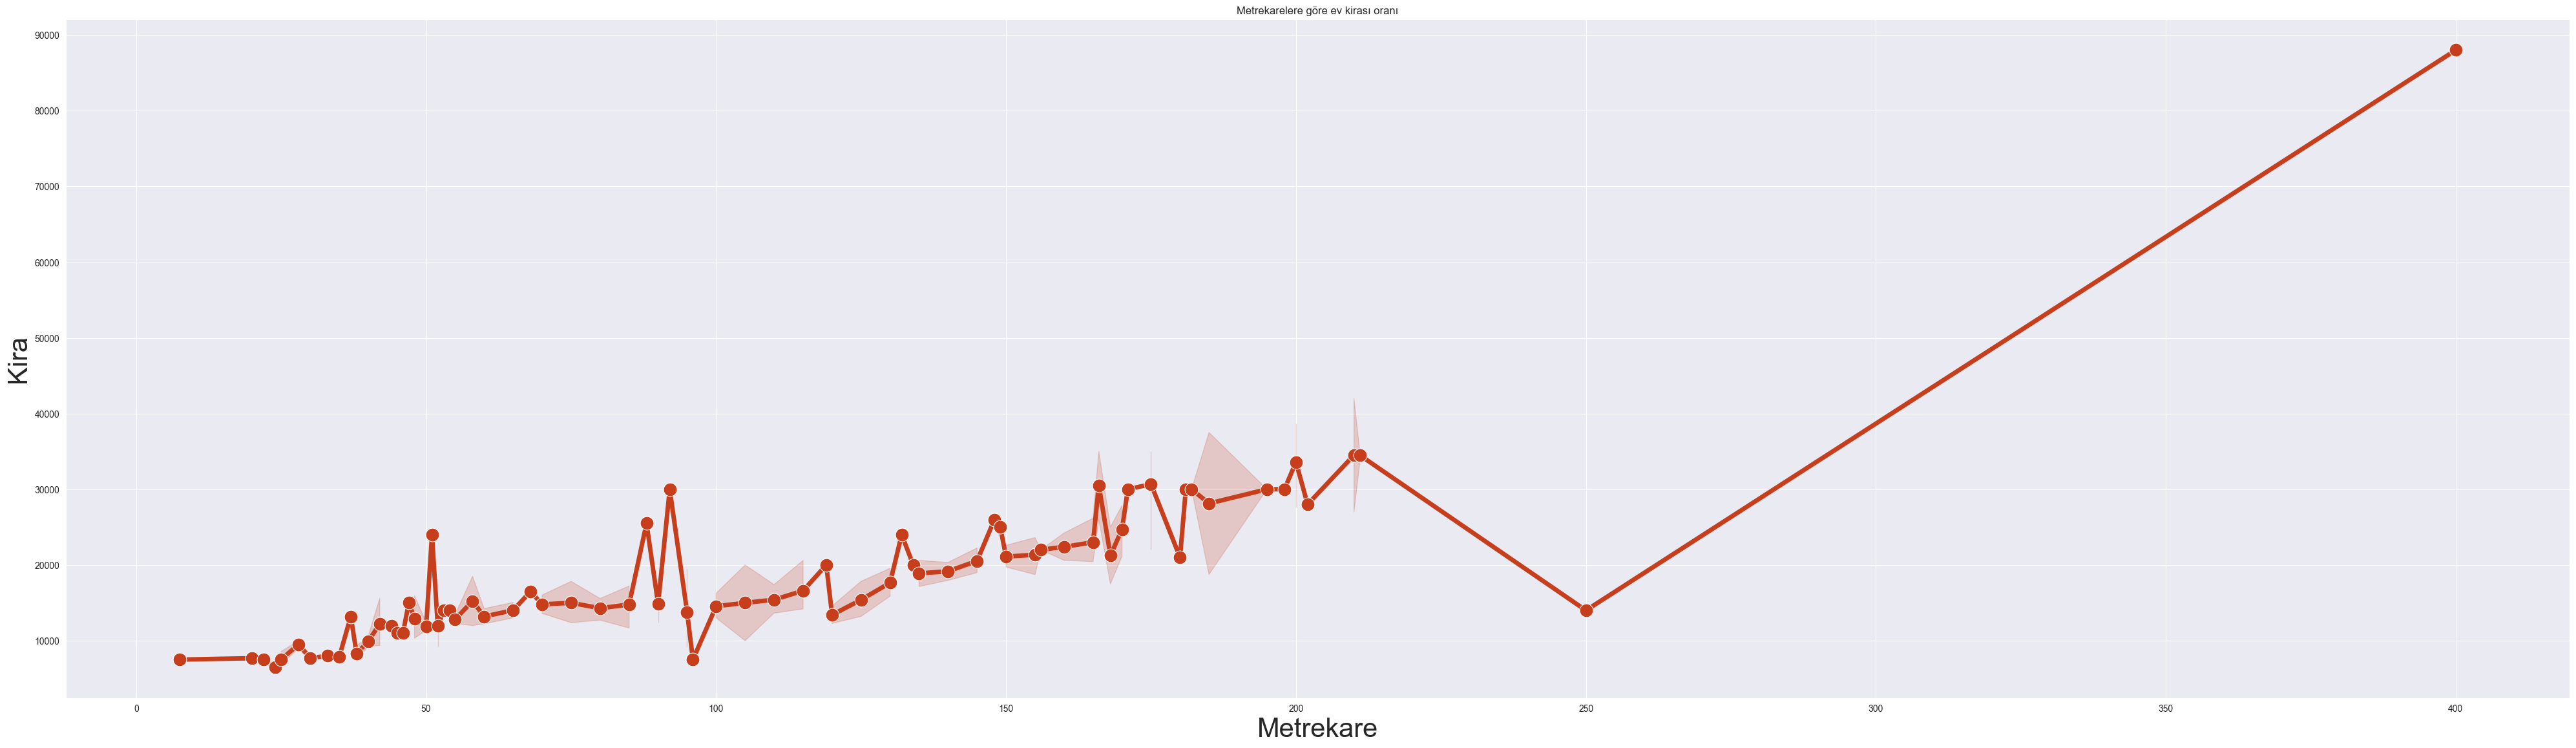

In [183]:
plt.figure(figsize=(50,30))
plt.subplot(2,1,1)
sns.lineplot(data=df,x='m2',y='price',marker='o',linewidth=5,markersize=15,color='#C73E1D')
plt.title('Metrekarelere göre ev kirası oranı')
plt.xlabel('Metrekare',fontsize=30)
plt.ylabel('Kira',fontsize=30)

In [192]:
splited_words=df.filter(like='Word_').stack().value_counts()
print(splited_words)

ki̇ralik         483
dai̇re           358
apart            322
2+1              213
3+1              213
                ... 
koleji̇            1
bahçeşehi̇r        1
nah.               1
kullanışlı1+1      1
kıralık            1
Name: count, Length: 1141, dtype: int64


0    isparta
Name: Word_1, dtype: object


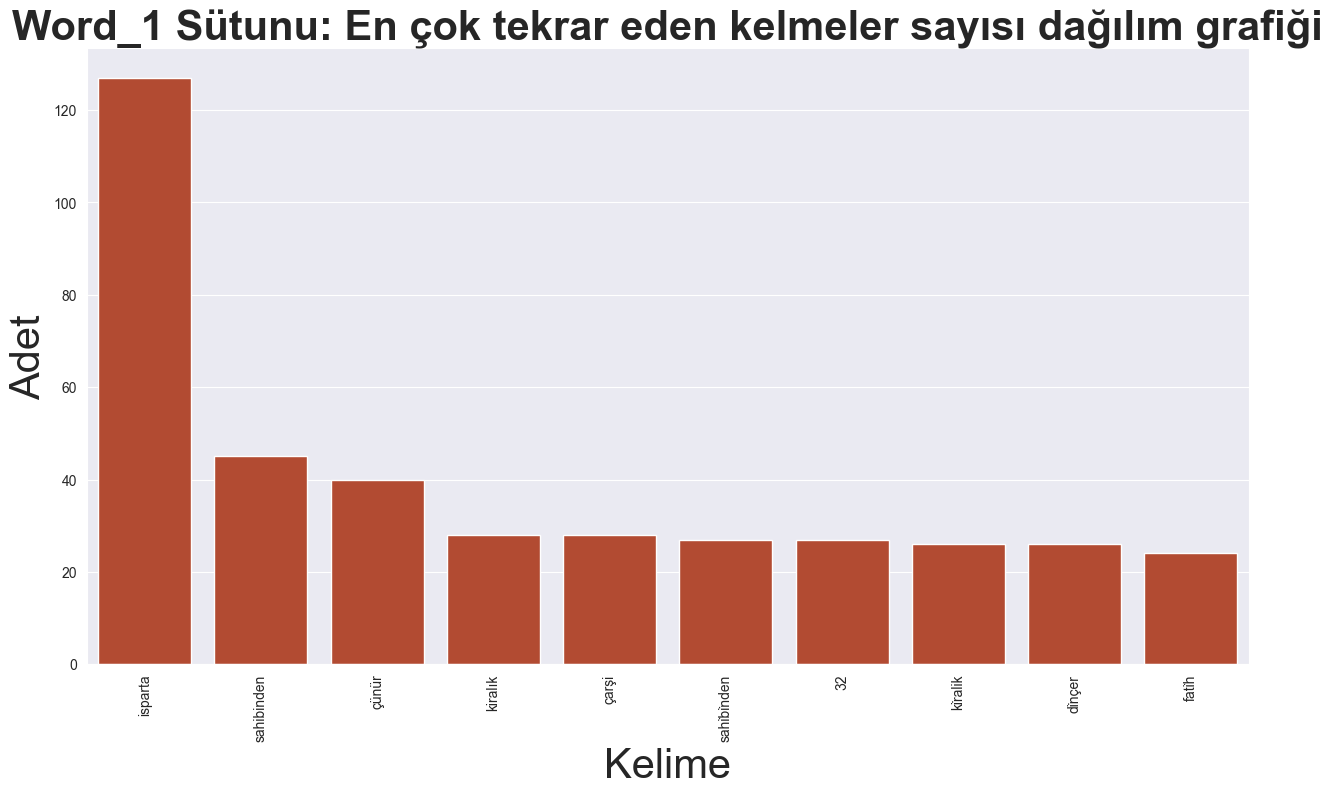

0    merkez
Name: Word_2, dtype: object


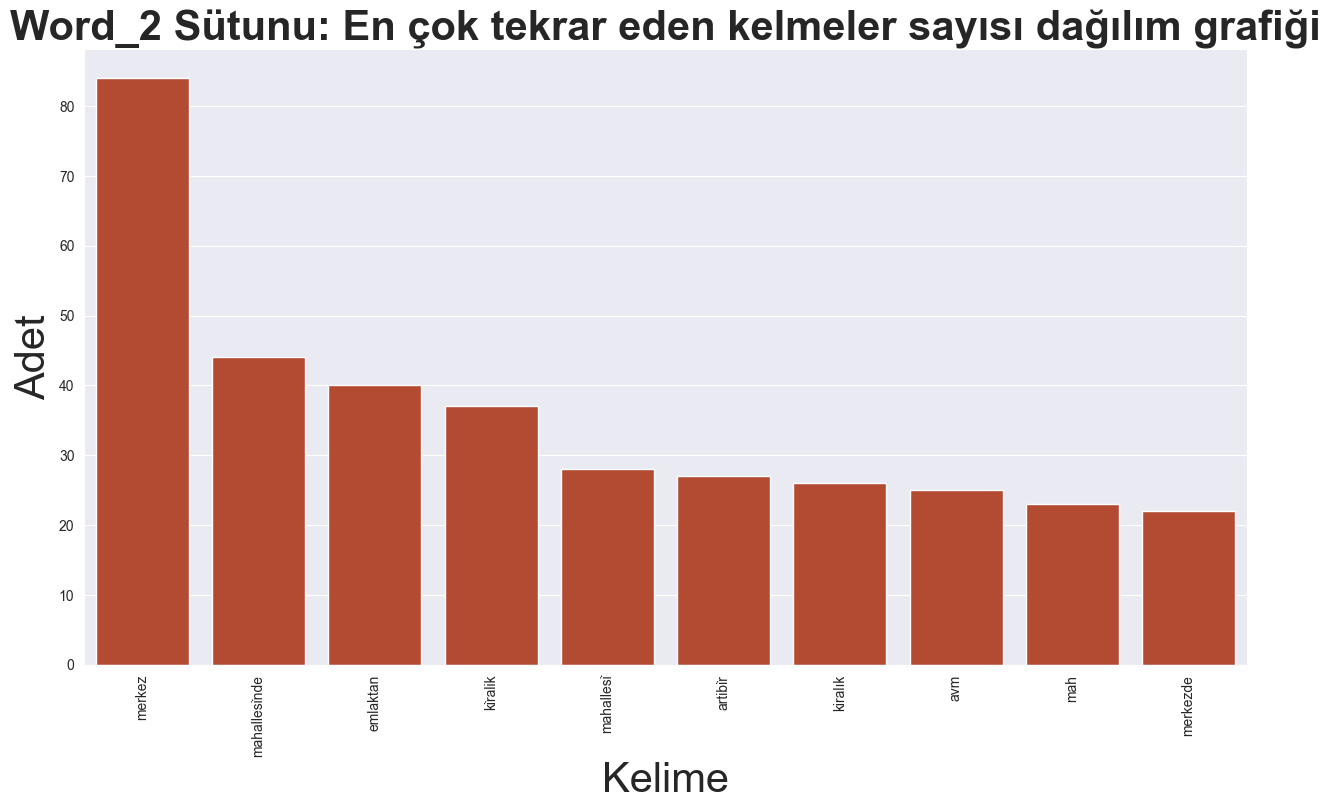

0    ki̇ralik
Name: Word_3, dtype: object


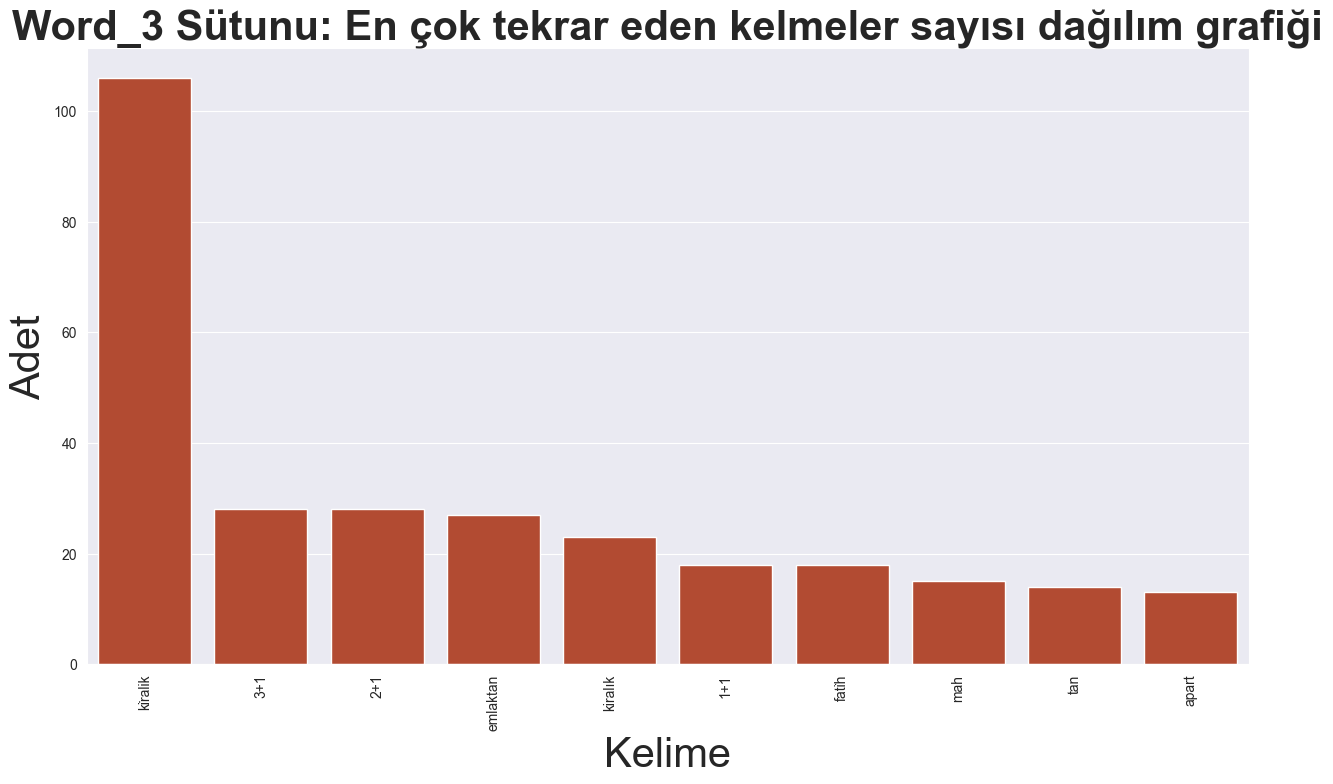

0    ki̇ralik
Name: Word_4, dtype: object


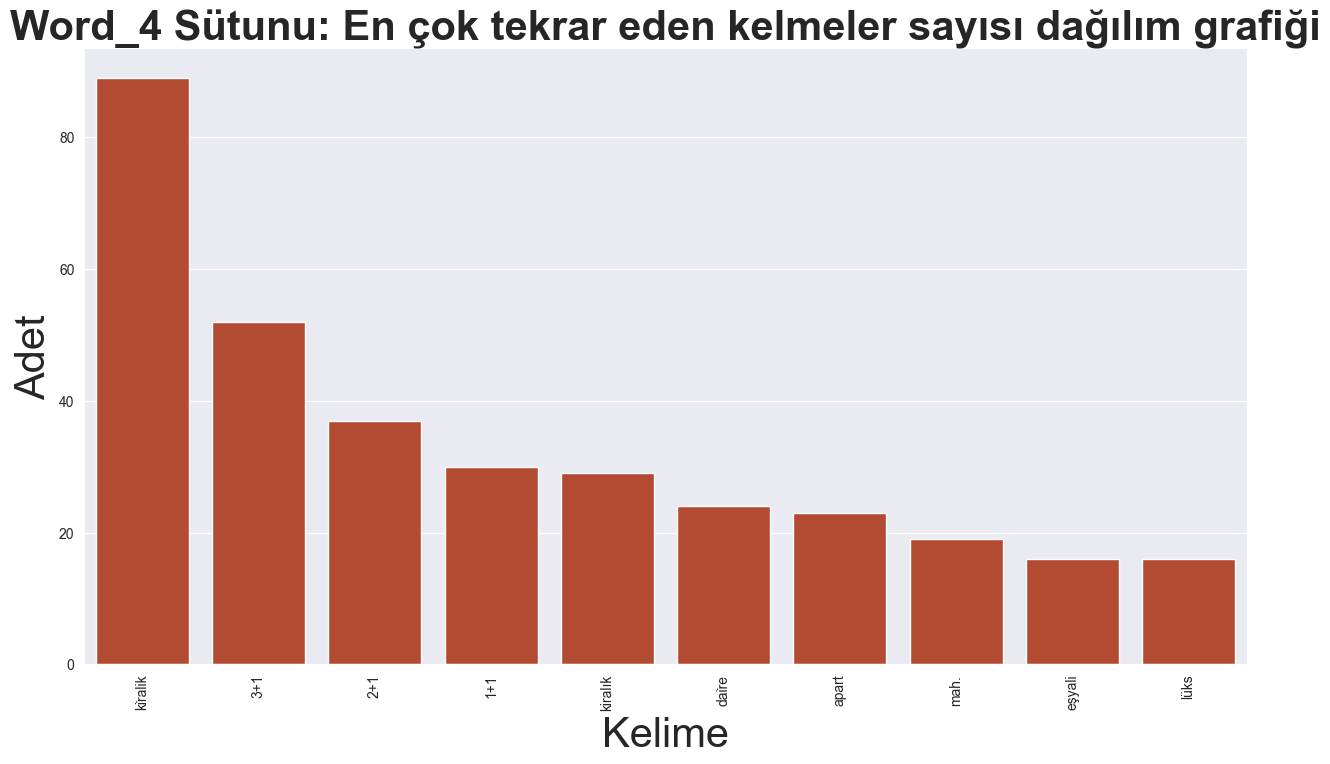

0    ki̇ralik
Name: Word_5, dtype: object


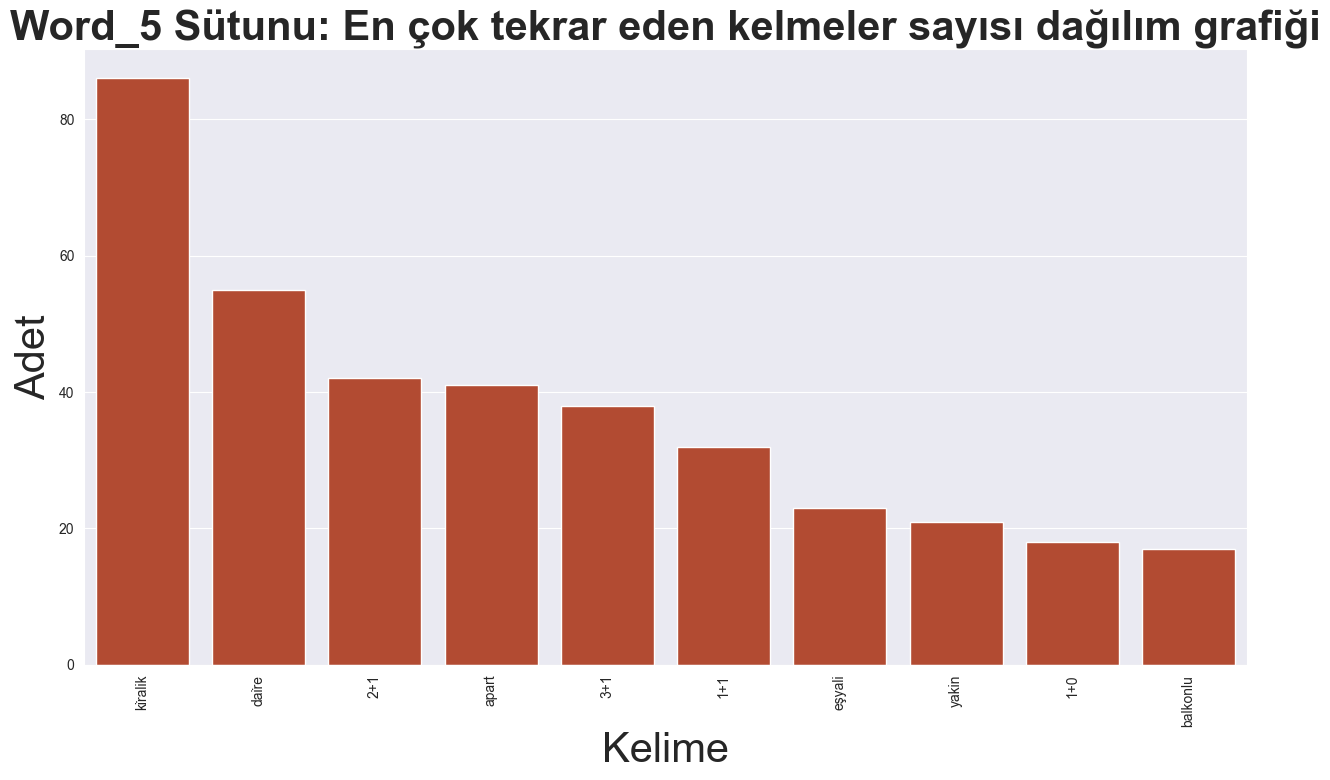

0    dai̇re
Name: Word_6, dtype: object


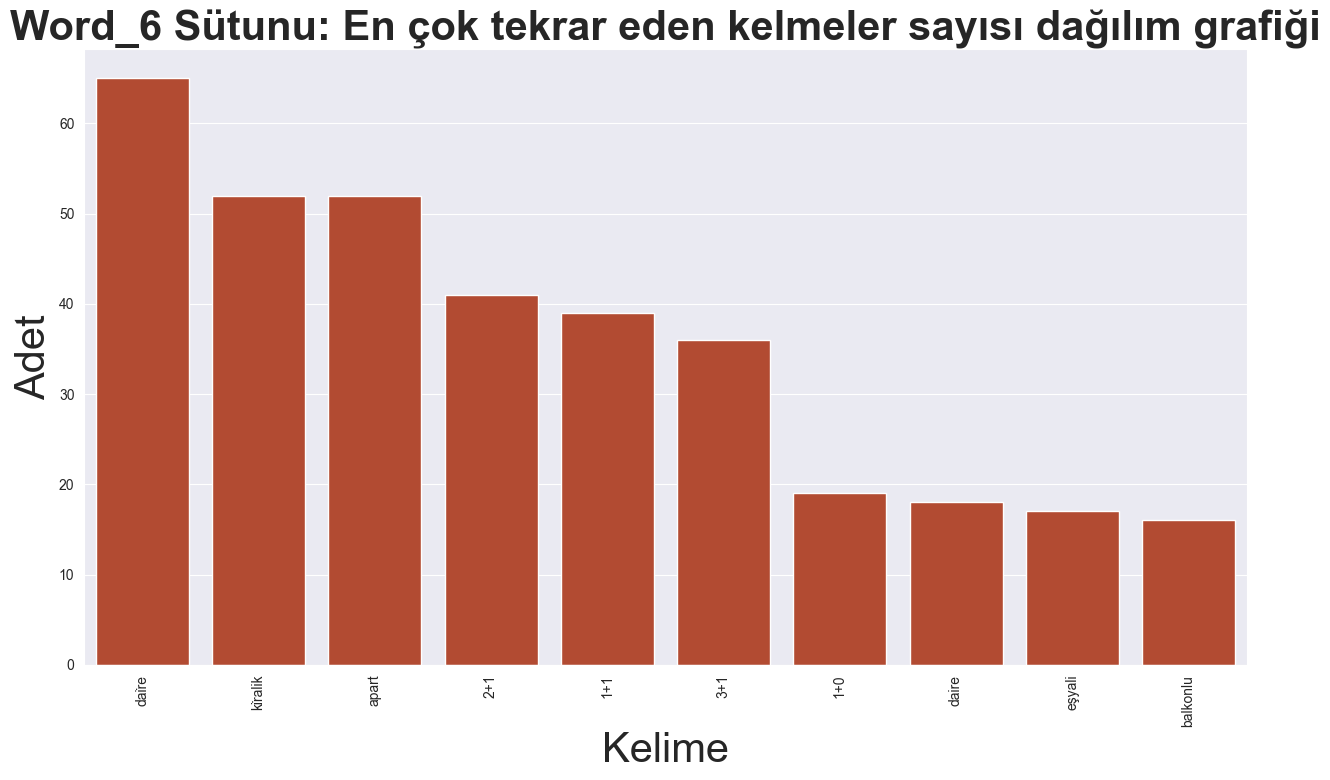

0    apart
Name: Word_7, dtype: object


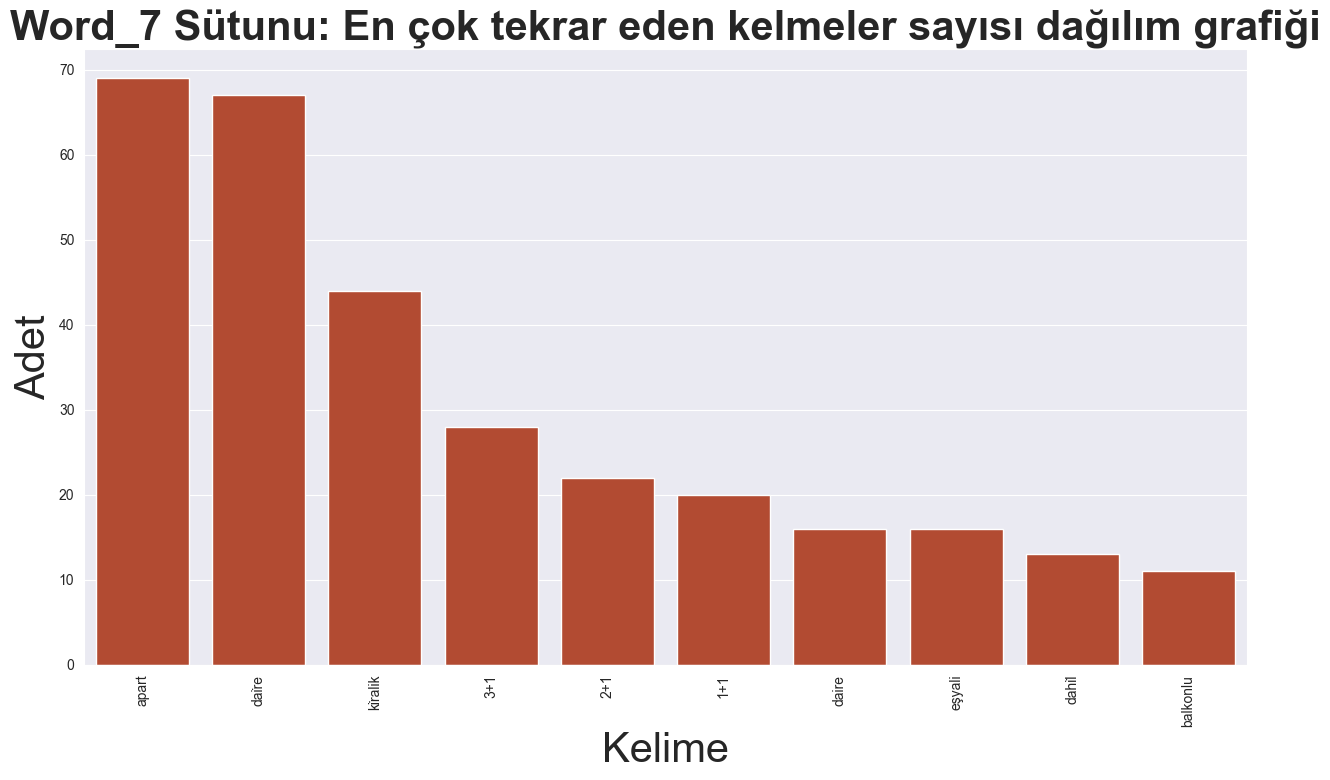

0    dai̇re
Name: Word_8, dtype: object


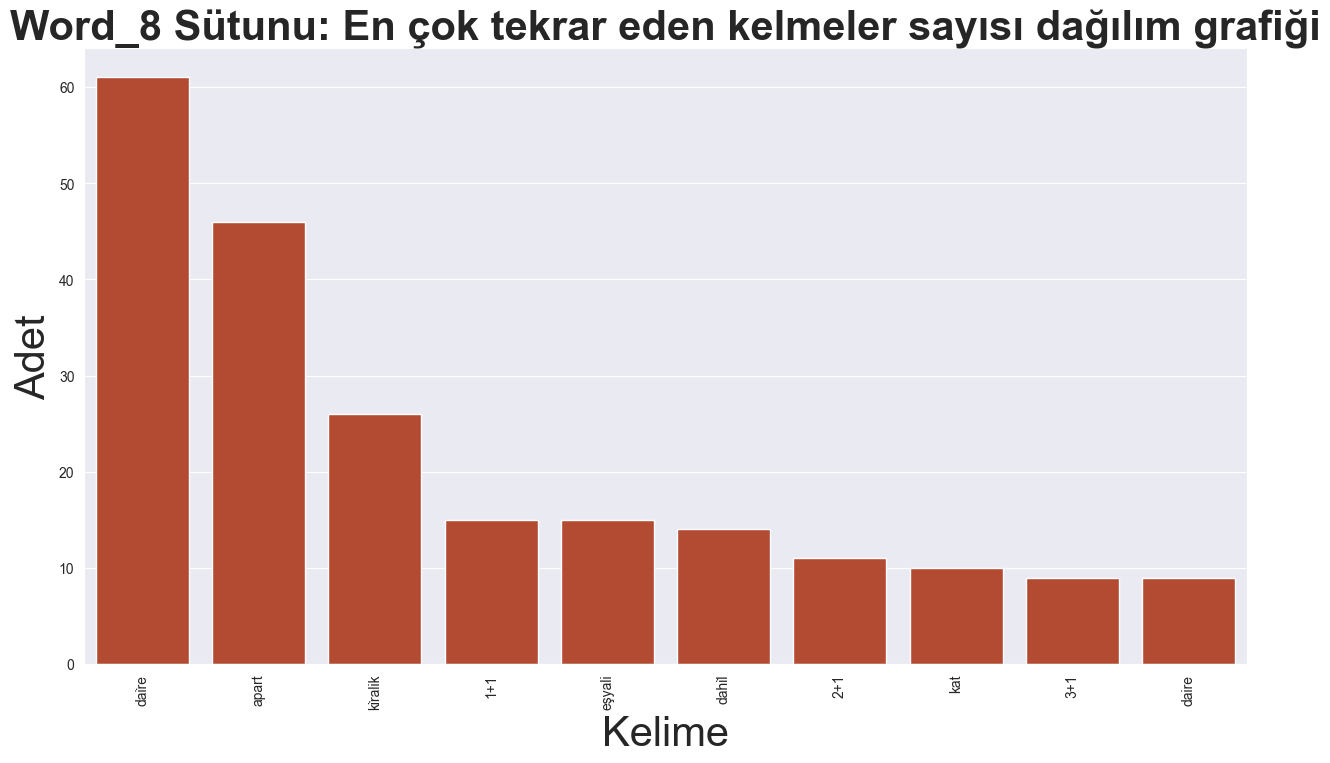

0    dai̇re
Name: Word_9, dtype: object


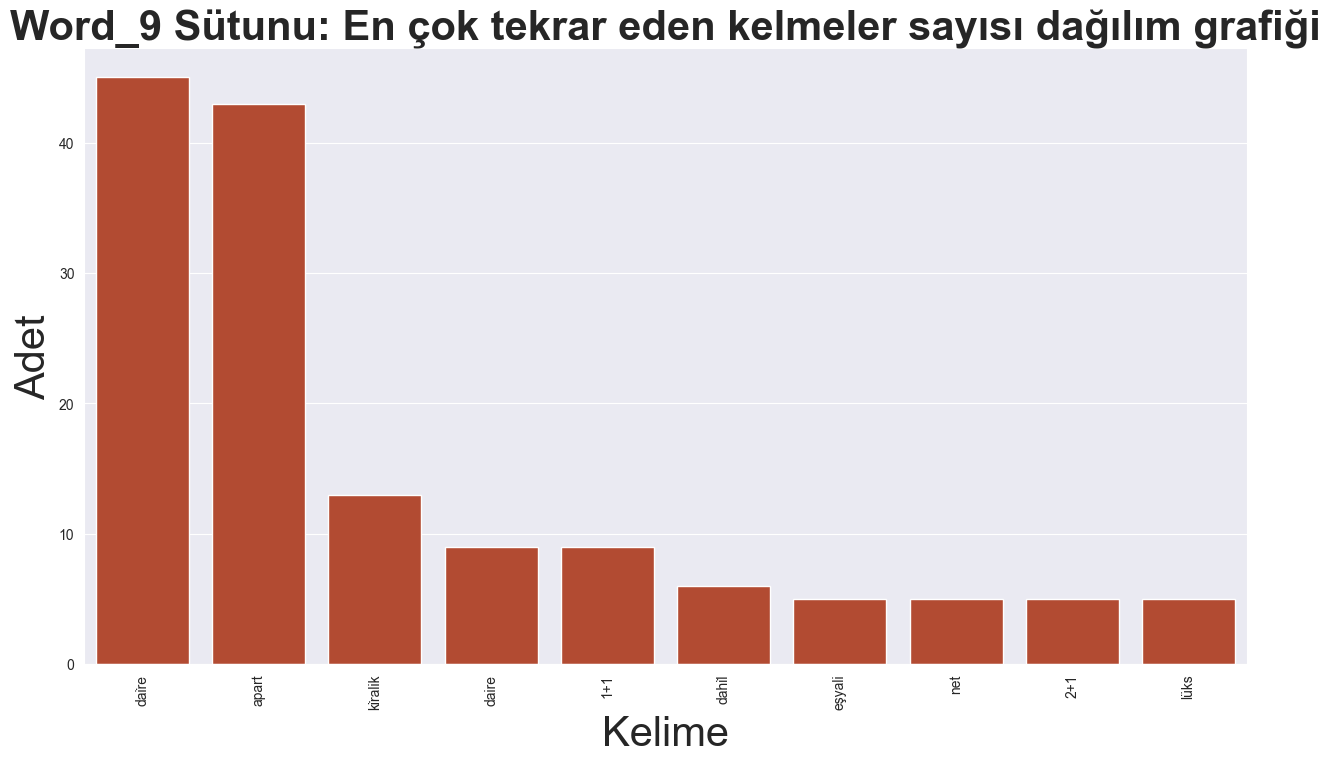

0    dai̇re
Name: Word_10, dtype: object


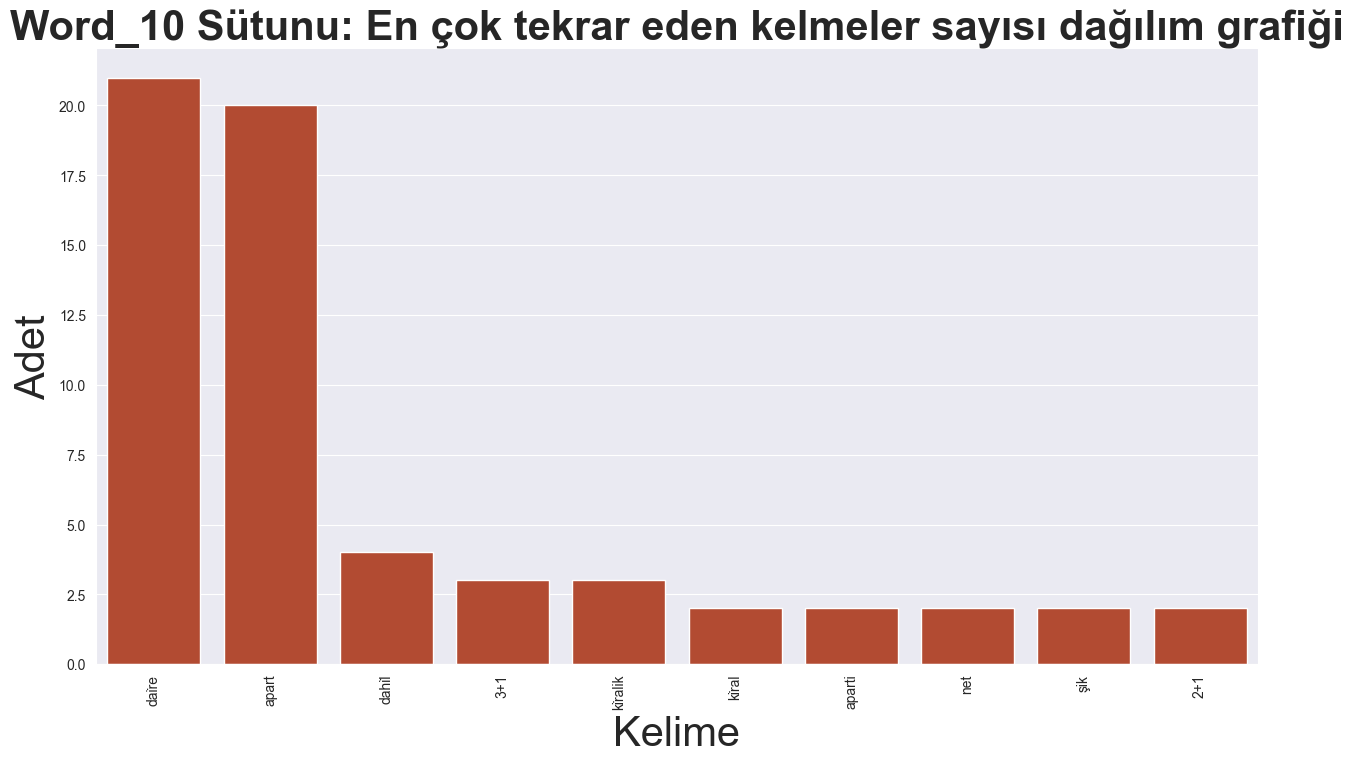

0    dai̇re
Name: Word_11, dtype: object


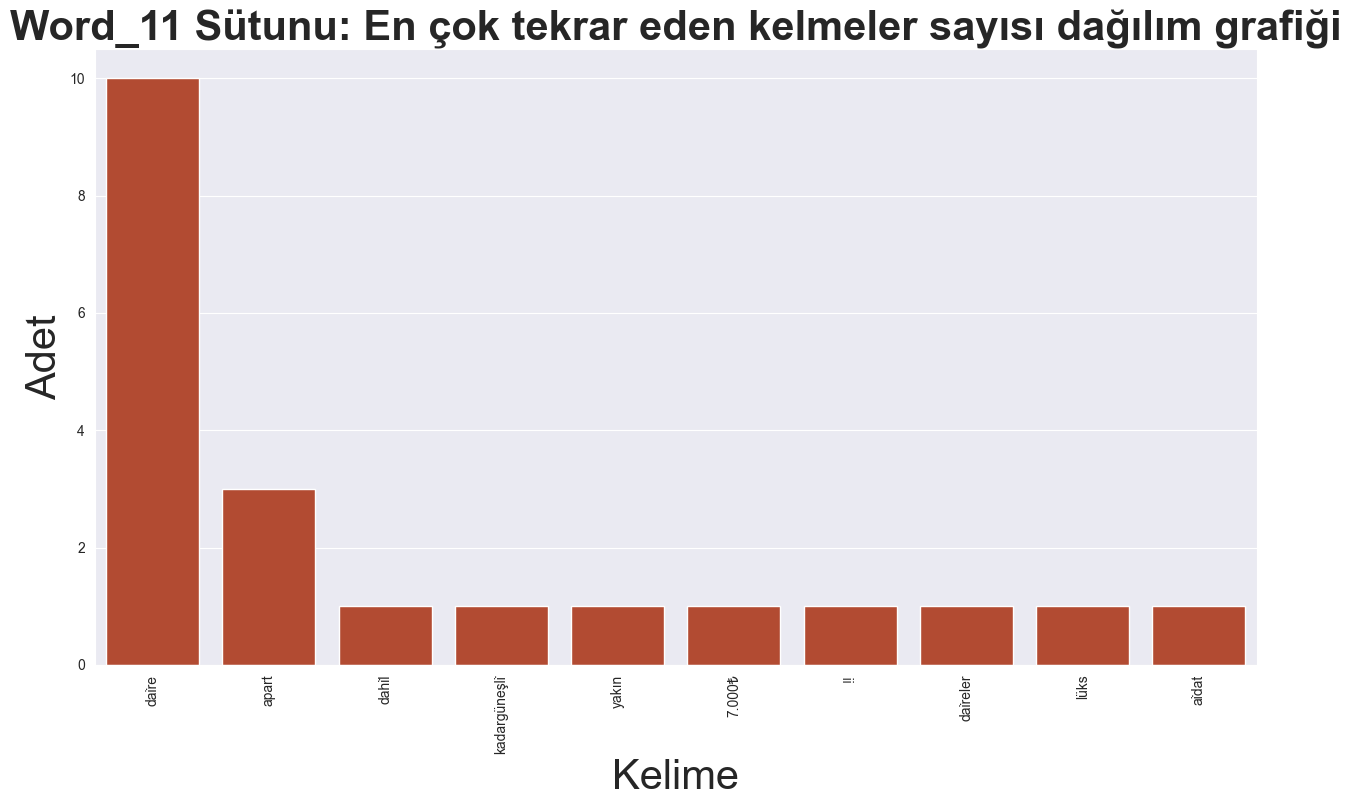

0    11.000₺
1      9.000
2      apart
3         d.
4      ki̇ra
Name: Word_12, dtype: object


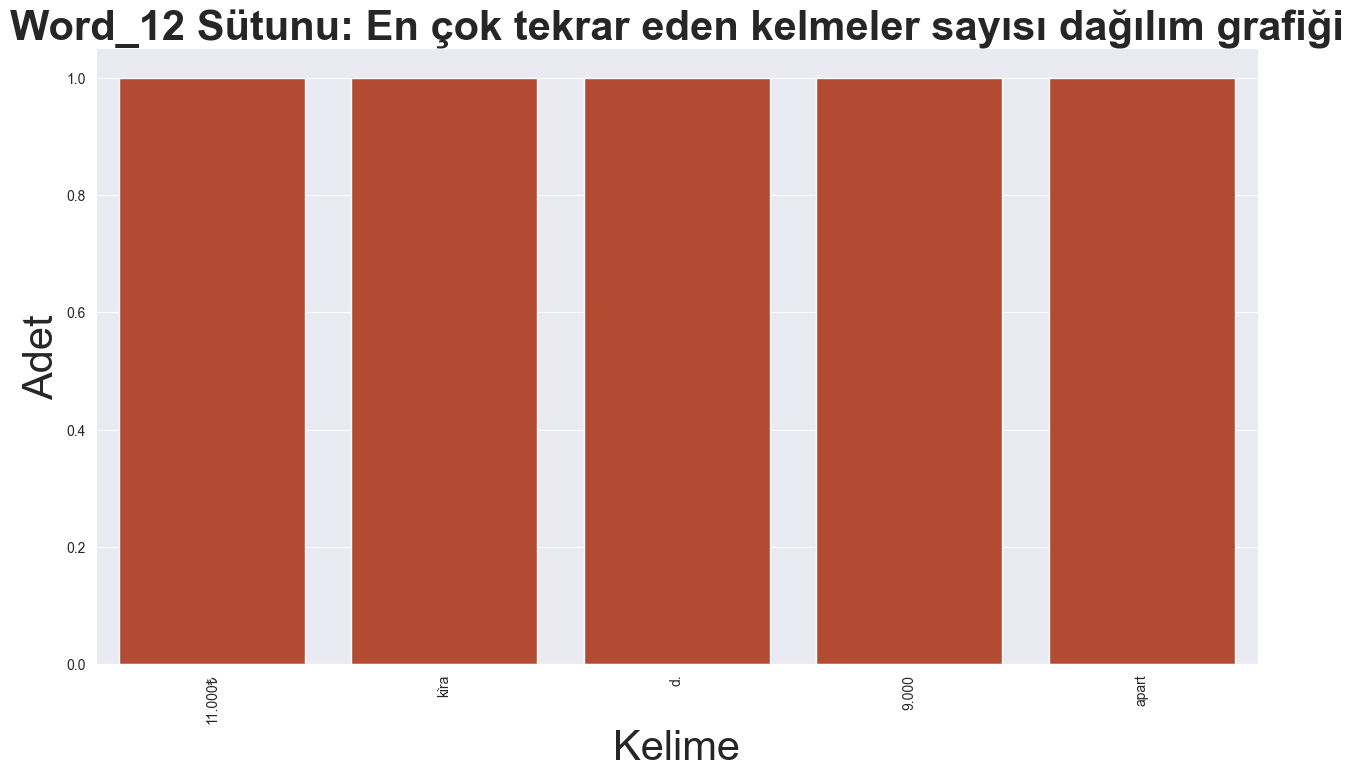

In [210]:
for i in range(title_split_data.shape[1]):
   top_10_word=df[f'Word_{i+1}'].value_counts(ascending=False).head(10).index
   print(df[f'Word_{i+1}'].mode())
   plt.figure(figsize=(15,8))
   sns.countplot(data=df,x=f'Word_{i+1}',color='#C73E1D',order=top_10_word)
   plt.title(f'Word_{i+1} Sütunu: En çok tekrar eden kelmeler sayısı dağılım grafiği',fontsize=30,fontweight='bold')
   plt.xlabel('Kelime',fontsize=30)
   plt.ylabel('Adet',fontsize=30)
   plt.xticks(rotation=90)
   plt.show()

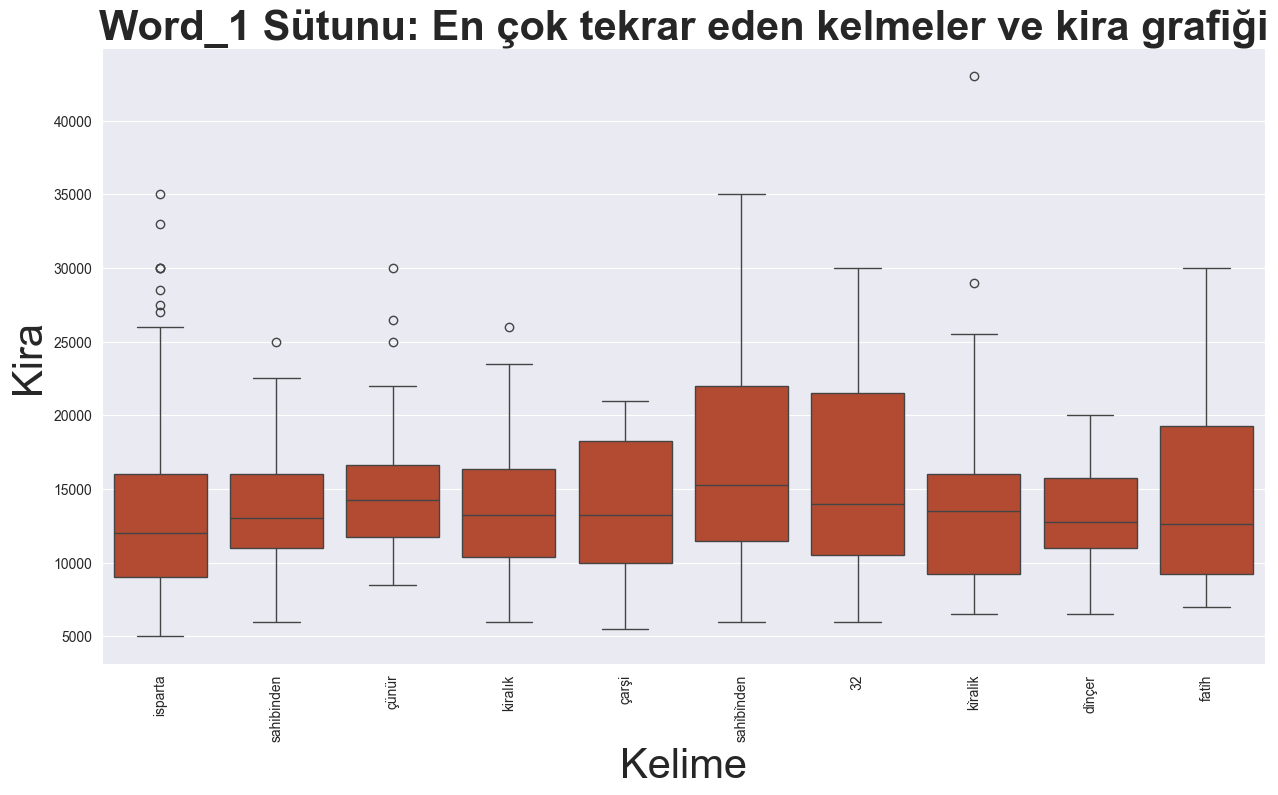

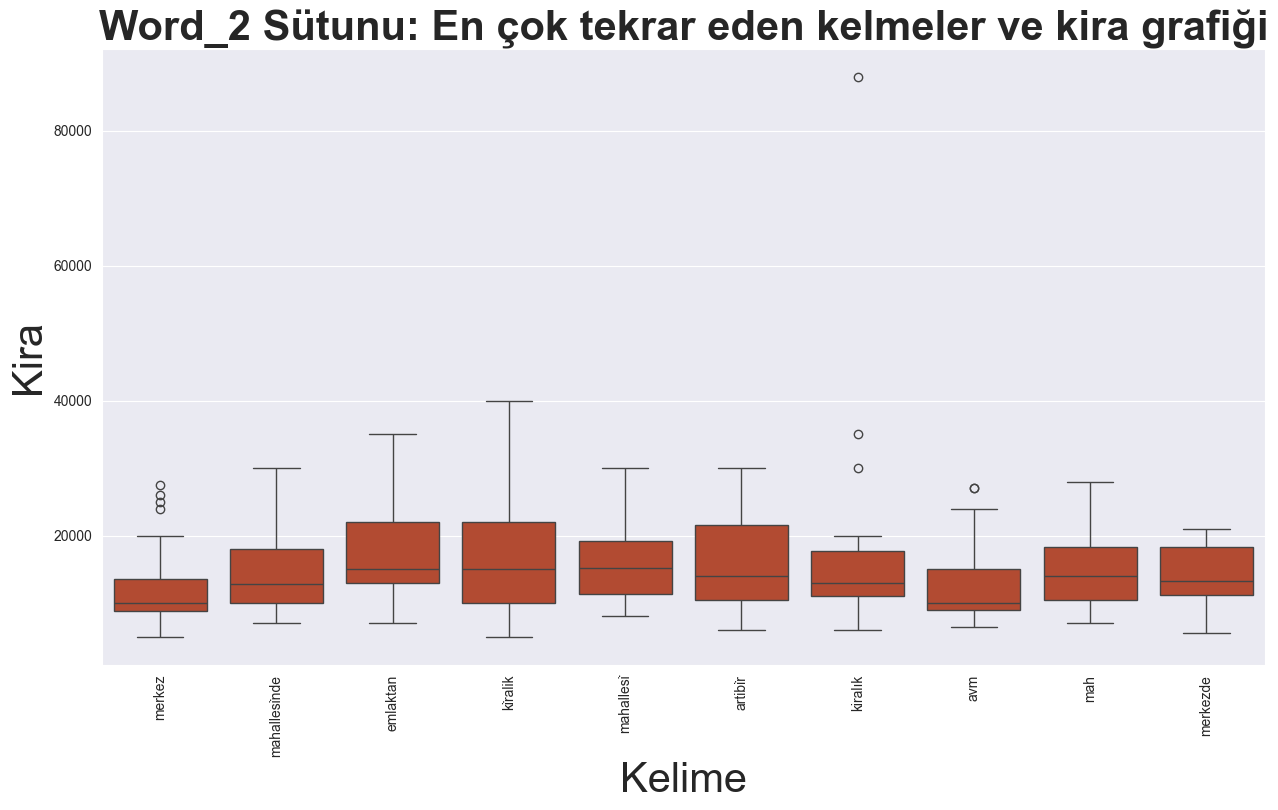

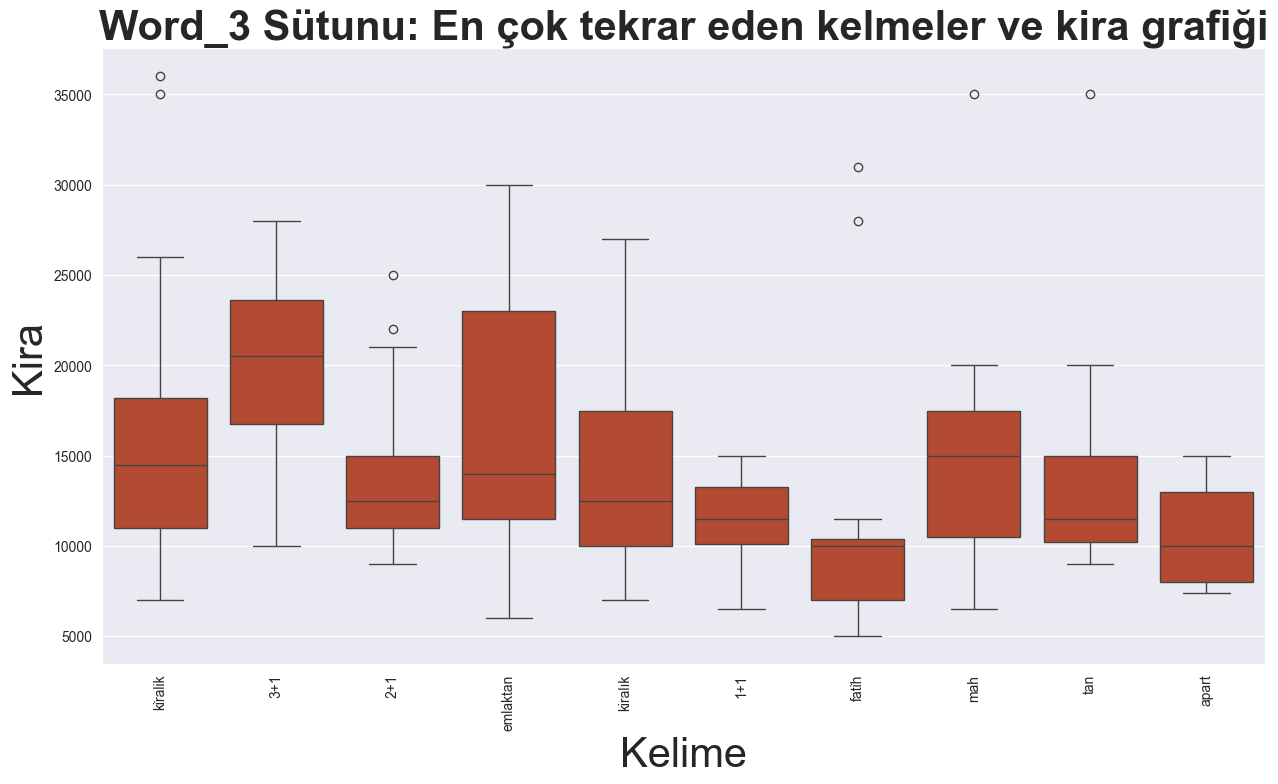

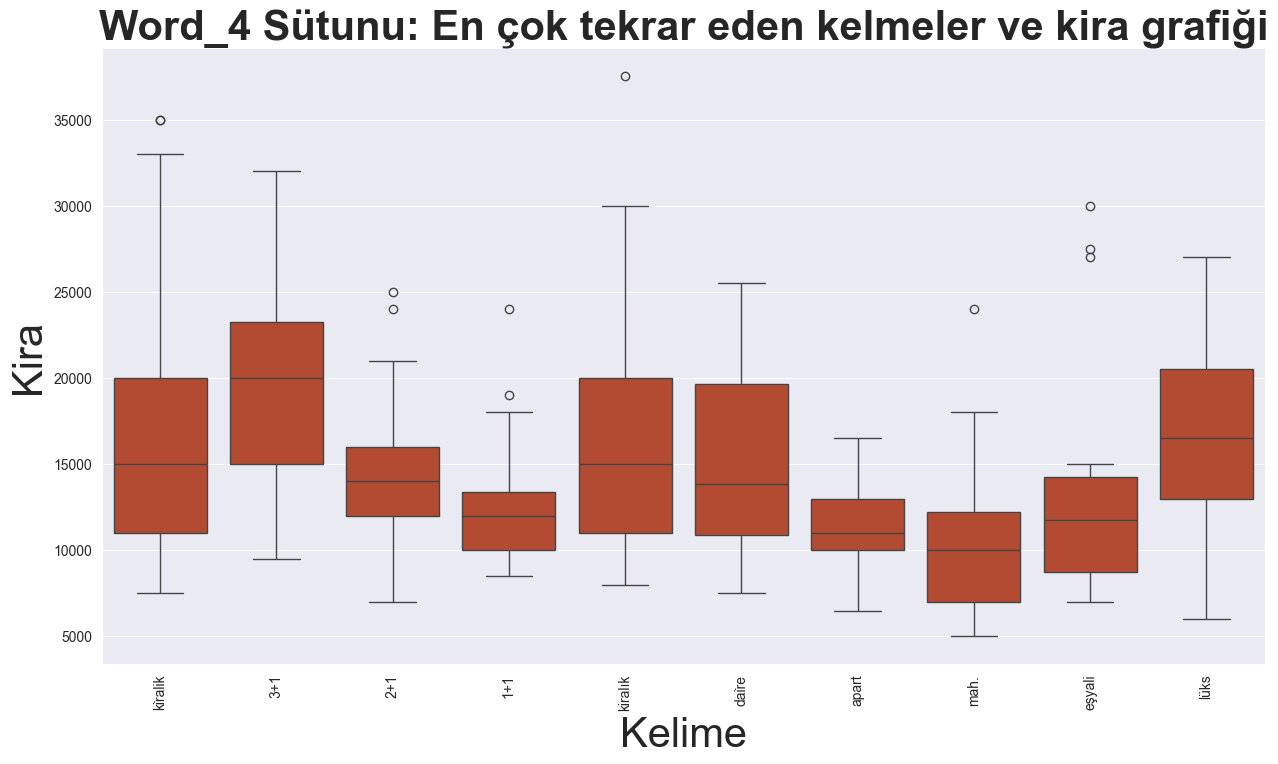

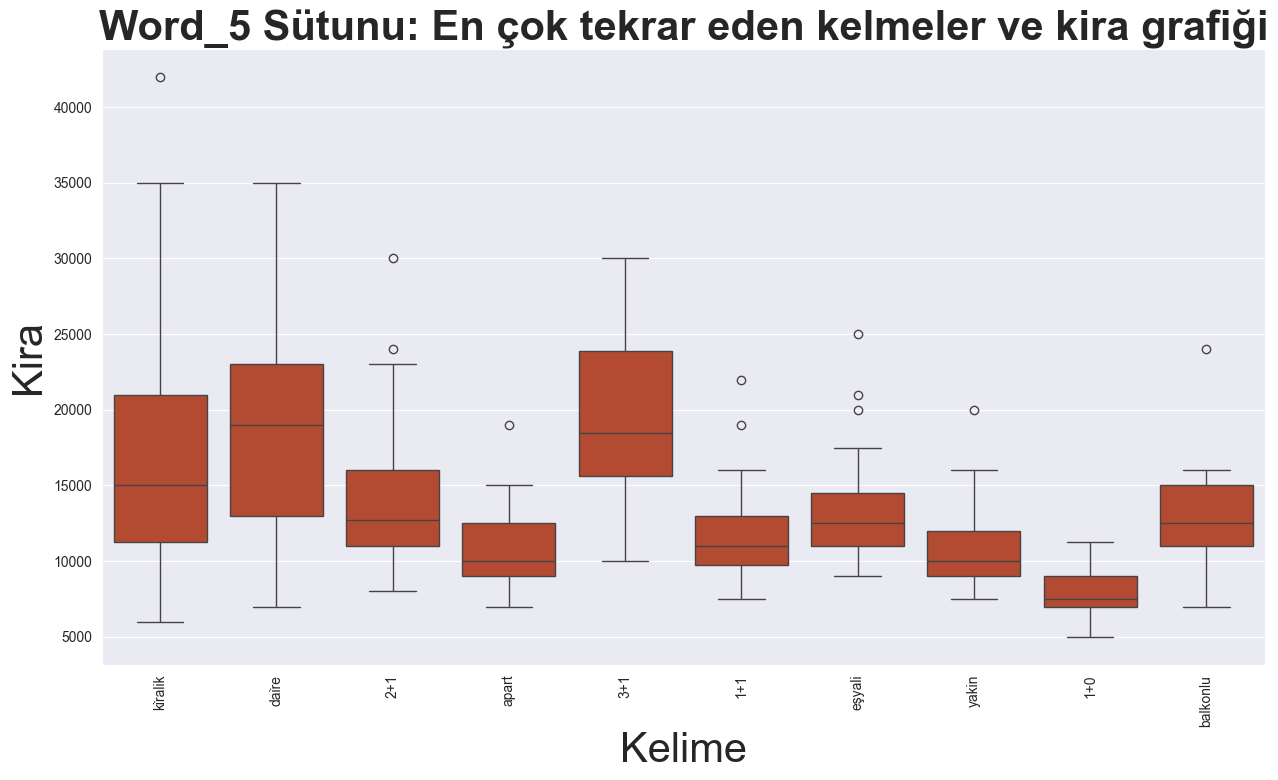

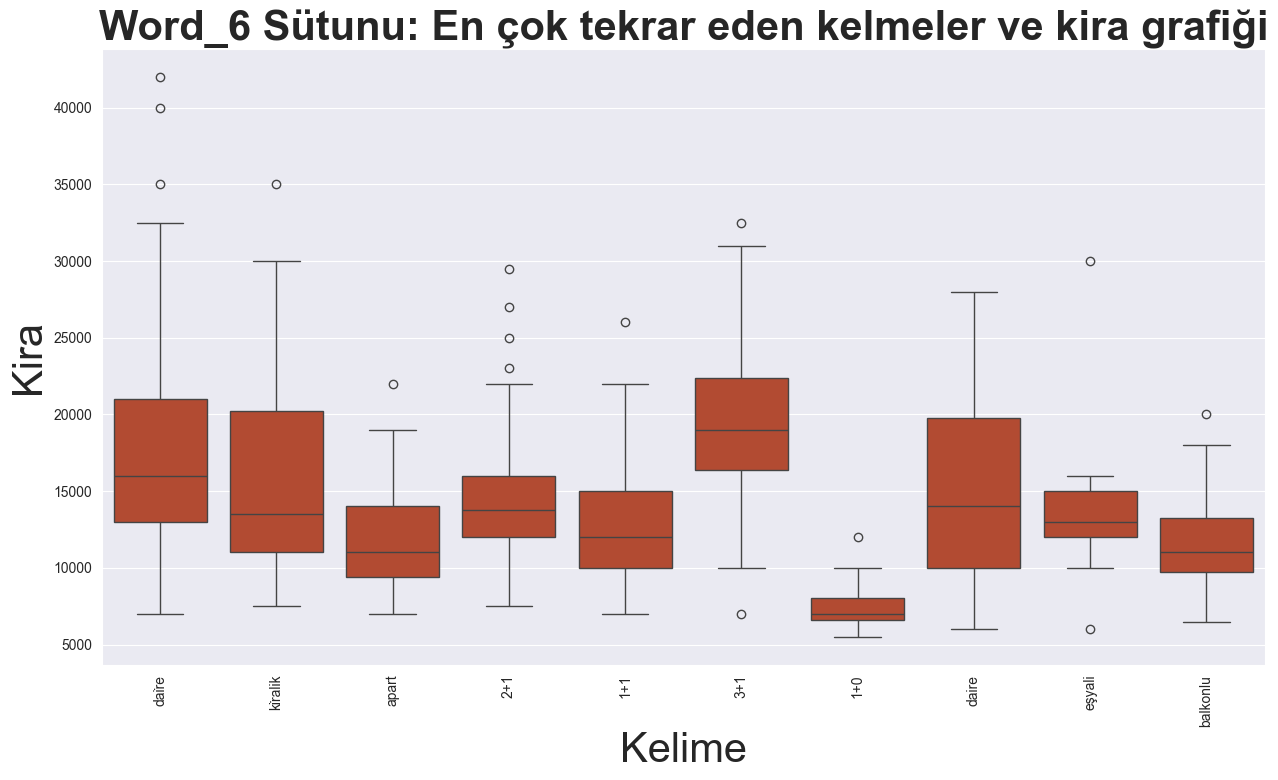

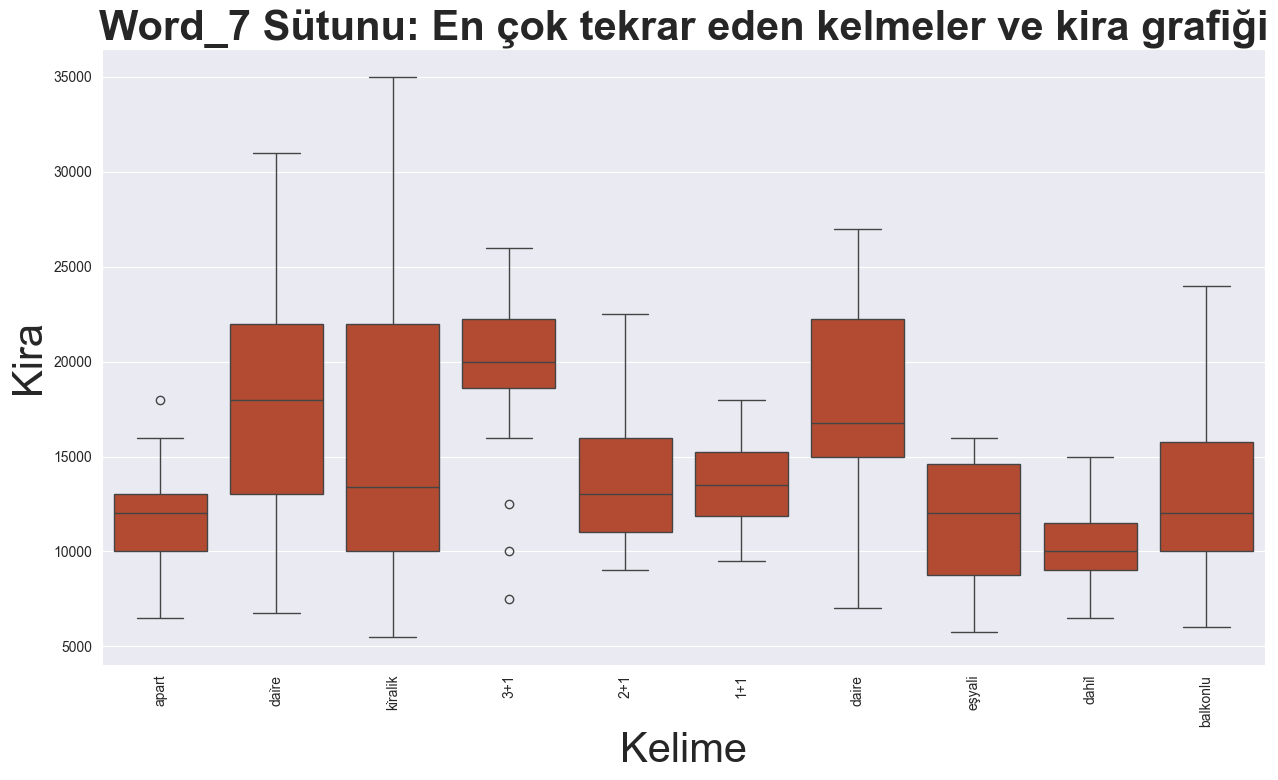

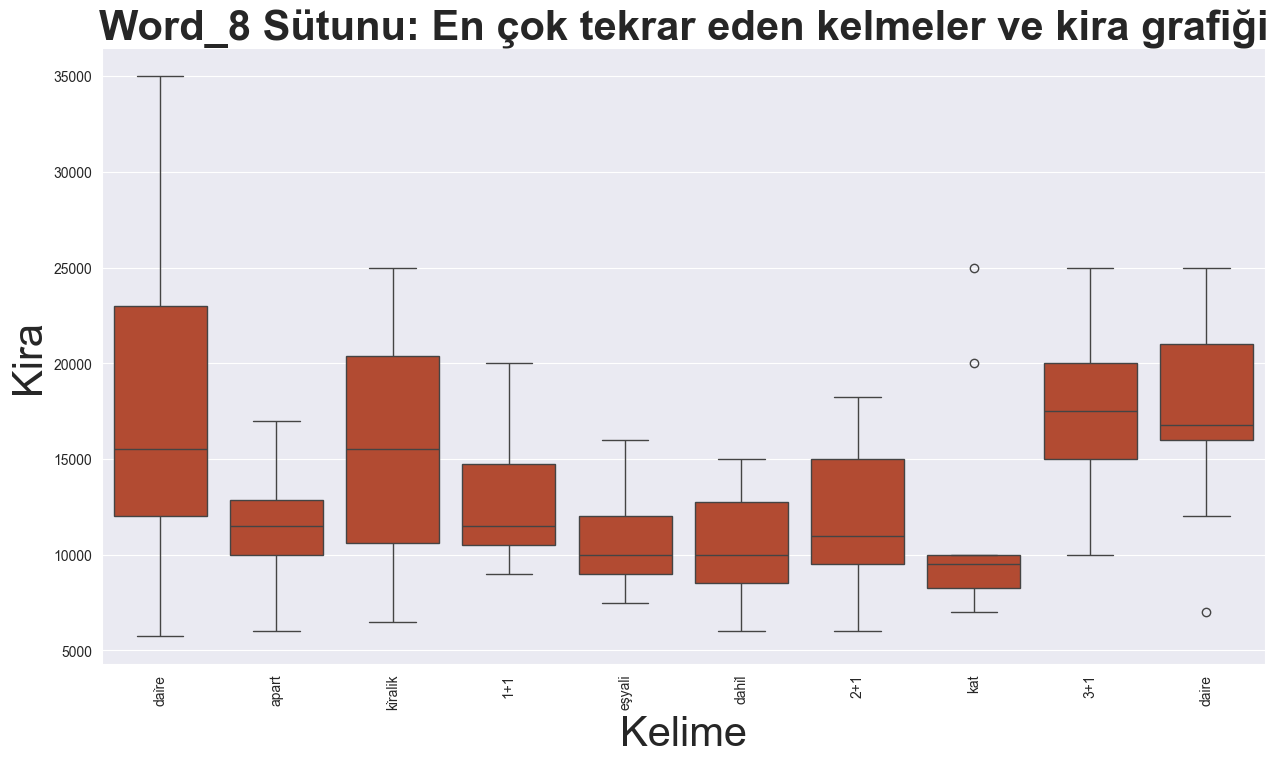

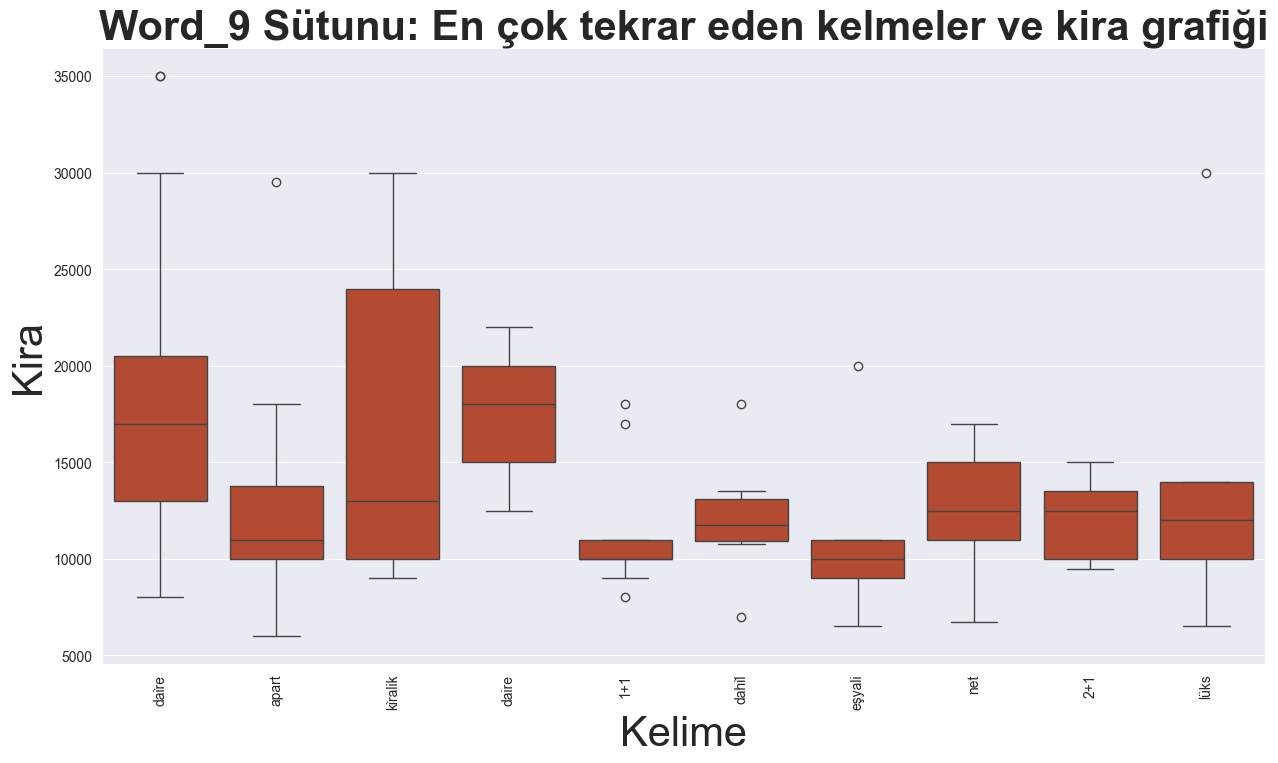

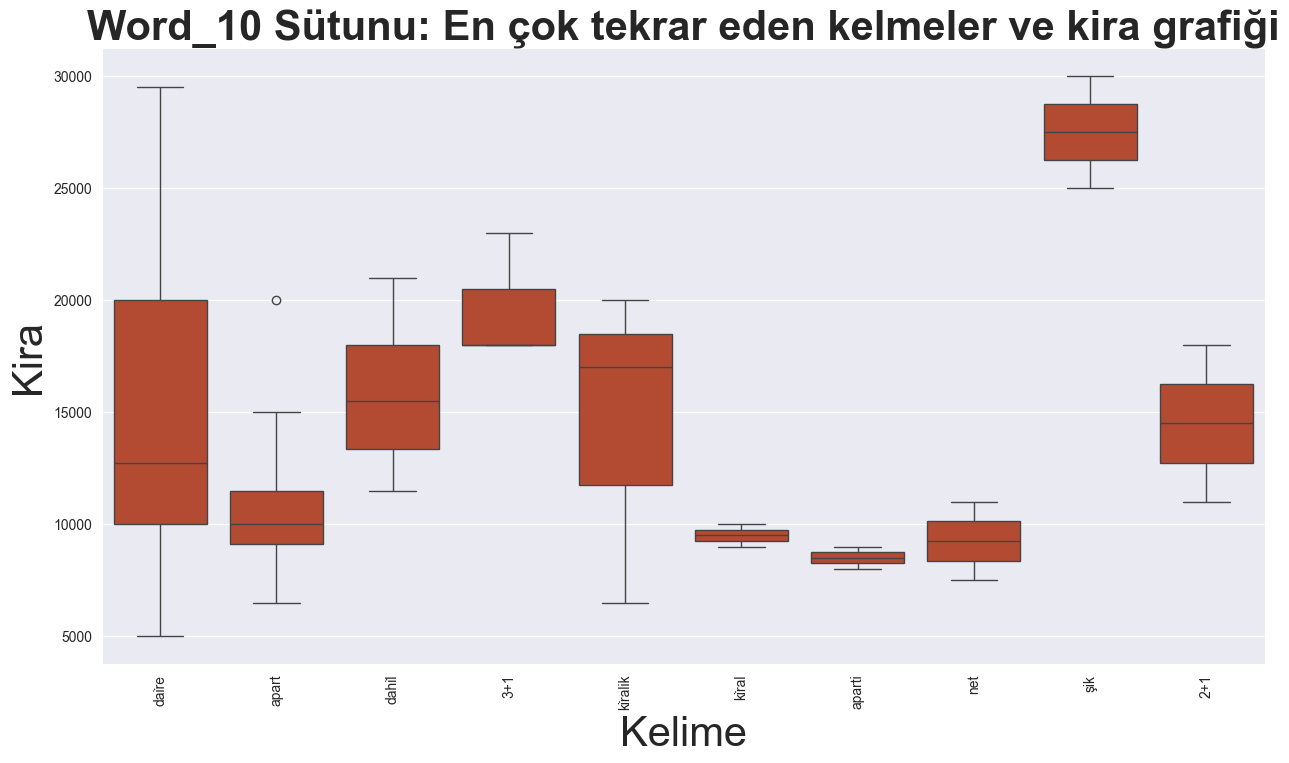

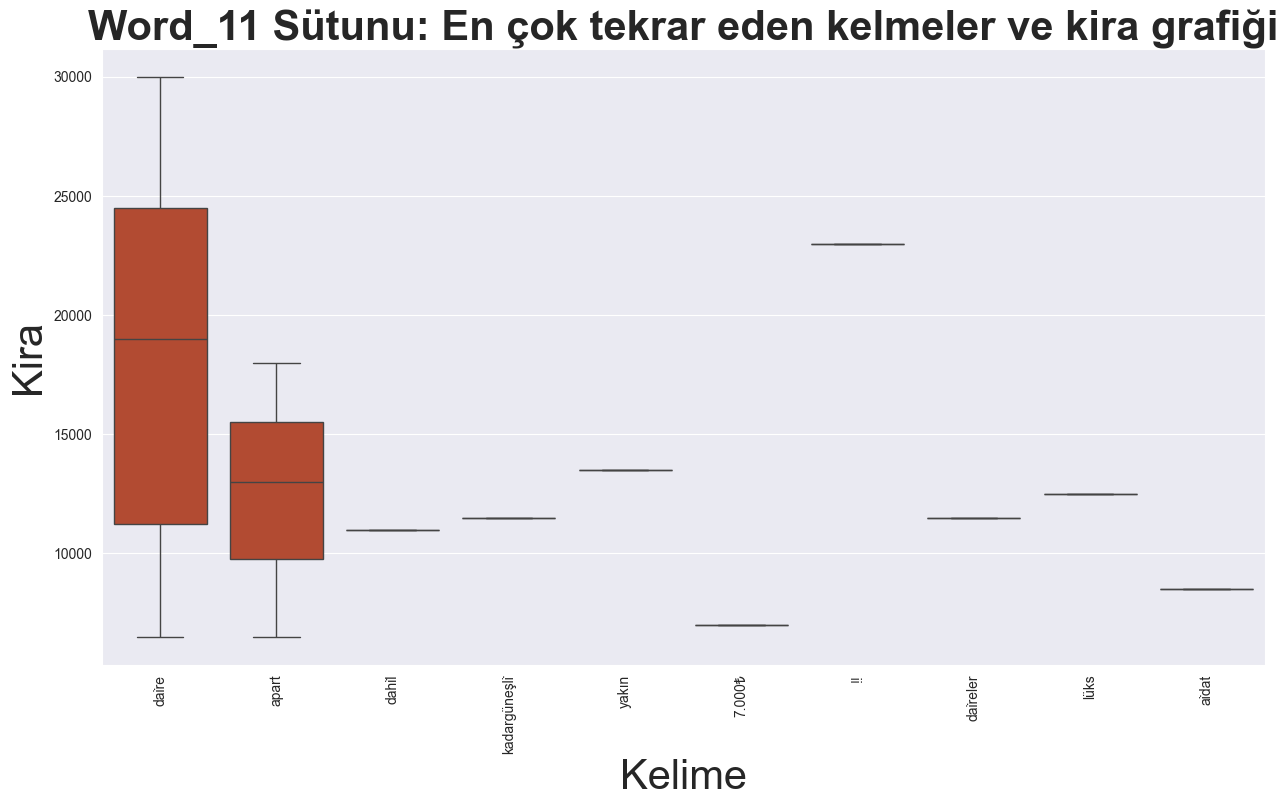

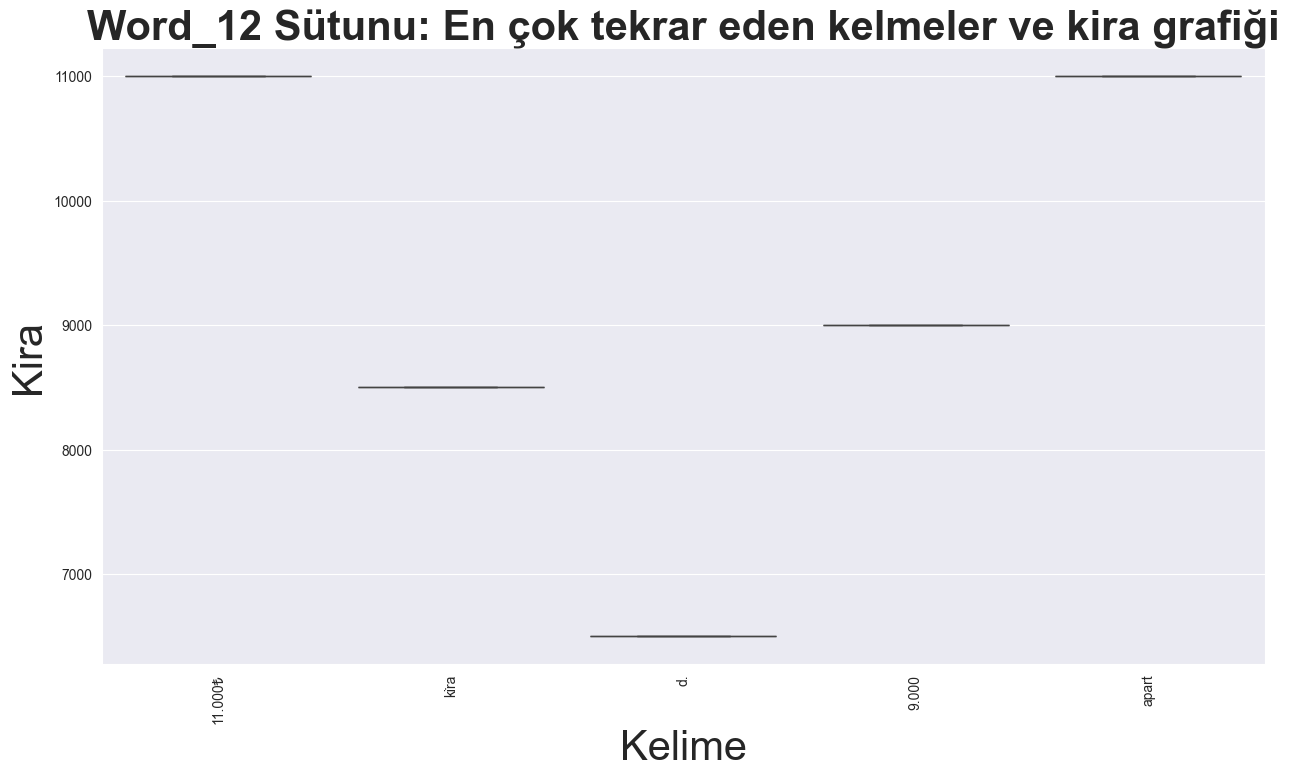

In [213]:
for i in range(title_split_data.shape[1]):
   top_10_word=df[f'Word_{i+1}'].value_counts(ascending=False).head(10).index
   plt.figure(figsize=(15,8))
   sns.boxplot(data=df,x=f'Word_{i+1}',y='price',color='#C73E1D',order=top_10_word)
   plt.title(f'Word_{i+1} Sütunu: En çok tekrar eden kelmeler ve kira grafiği',fontsize=30,fontweight='bold')
   plt.xlabel('Kelime',fontsize=30)
   plt.ylabel('Kira',fontsize=30)
   plt.xticks(rotation=90)
   plt.show()